<hr>
# [cknowledge.org](http://cknowledge.org): Community-driven benchmarking and optimization of computing systems - from classical to quantum
<hr>

[Quantum Computing](https://github.com/ctuning/ck-quantum/wiki)
* [CK-QISKit](https://github.com/ctuning/ck-qiskit) (IBM)
* [CK-Rigetti](https://github.com/ctuning/ck-rigetti) ([Rigetti Computing](https://rigetti.com/))
* [CK-ProjectQ](https://github.com/ctuning/ck-projectq) ([ProjectQ](https://projectq.ch/))

[Artificial Intelligence and Machine Learning](http://cknowledge.org/ai)
* [Reproducible Quality-Efficient Systems Tournaments](http://cknowledge.org/request) ([ReQuEST initiative](http://cknowledge.org/request.html#organizers))
* [AI artifacts](http://cknowledge.org/ai-artifacts) (cTuning foundation)
* [Android app](https://play.google.com/store/apps/details?id=openscience.crowdsource.video.experiments) (dividiti)
* [Desktop app](https://github.com/dividiti/ck-crowdsource-dnn-optimization) (dividiti)
* [CK-Caffe](https://github.com/dividiti/ck-caffe) (Berkeley)
* [CK-Caffe2](https://github.com/ctuning/ck-caffe2) (Facebook)
* [CK-CNTK](https://github.com/ctuning/ck-cntk) (Microsoft)
* [CK-KaNN](https://github.com/dividiti/ck-kann) (Kalray)
* [CK-MVNC](https://github.com/ctuning/ck-mvnc) (Movidius / Intel)
* [CK-MXNet](https://github.com/ctuning/ck-mxnet) (Apache)
* [CK-NNTest](https://github.com/ctuning/ck-nntest) (cTuning foundation)
* [CK-TensorFlow](https://github.com/ctuning/ck-tensorflow) (Google)
* [CK-TensorRT](https://github.com/dividiti/ck-tensorrt) (NVIDIA)
* etc.

<hr>
# Variational Quantum Eigensolver (VQE) on Rigetti machines
[Quantum Collective Knowledge Hackaton](https://www.eventbrite.co.uk/e/quantum-computing-hackathon-tickets-46441126660#), [Centre for Mathematical Science - University of Cambridge](http://www.cms.cam.ac.uk/), 15 June 2018

## Table of Contents

1. [Organisers](#organisers)
1. [References](#references)
1. [Time-to-solution metric](#metric)
1. [Setting up](#settingup)
1. [Running experiments](#running)
1. [Experimental data](#data)
1. [Data wrangling code](#code) (for developers)
1. [Analysis](#analysis)

<a id="organisers"></a>
## Organisers

- [Rigetti Computing](https://rigetti.com): access to [Quantum Virtual Machine](http://pyquil.readthedocs.io/en/latest/qvm.html) (QVM) and [Quantum Processing Unit](http://pyquil.readthedocs.io/en/latest/qpu.html) (QPU).
- [River Lane Research](https://riverlane.io/): Steve Brierley, Oscar Higgott, Daochen Wang, Amy Flower
- [dividiti](http://dividiti.com/): Anton Lokhmotov, Leo Gordon, Flavio Vella, Grigori Fursin

<a id="references"></a>
## References

- [Rigetti's docs](http://grove-docs.readthedocs.io/en/latest/vqe.html)
- ["A variational eigenvalue solver on a quantum processor"](https://arxiv.org/abs/1304.3061) (2013)
- ["The theory of variational hybrid quantum-classical algorithms"](https://arxiv.org/abs/1509.04279) (2015)
- ["Quantum optimization using variational algorithms
on near-term quantum devices"](https://arxiv.org/abs/1710.01022) [2017]

<a id="metric"></a>
## Time-to-solution metric

To compare solutions of participants we use a **time-to-solution** $T$ metric defined as follows.

### Definition

Let's assume that to find the ground state of a given molecule (e.g. [Helium](https://en.wikipedia.org/wiki/Helium)) a participant makes $N$ runs of their implementation (e.g. $N=3$). A run is considered _successful_ if the ground state found in this run is equal to the ground state known for the molecule to given precision $\delta$ (e.g. $\delta=0.1$). Assume that a single run takes $t$ samples (calls to the quantum computer) on average.

Let $s$ be the probability of success of the participant's VQE implementation (i.e. the number of successful runs divided by the total number of runs $N$).

Let $R$ be the number of runs required to find the ground state with given probability $p$ (e.g. $p=0.6$):
\begin{equation}
R = {\frac{\log(1-p)}{\log(1-s)}}.
\end{equation}

The **time-to-solution** $T$, defined as the total number of samples used throughout the whole optimisation procedure of VQE, is then calculated as:
\begin{equation}
T = R \times t.
\end{equation}

### Derivation

If the probability of success is $s$, then the probability of _failing to find_ the ground state after $R$ runs is $(1-s)^R$. Therefore, the probability of finding the ground state at least once after $R$ runs is $p =1 - (1-s)^R$. Therefore, the number of runs $R$ required to find the ground state at least once with probability $p$ can be found by solving $p=1-(1-s)^R$.

### Uncertainties

We can also calculate the standard error associated with the calculated time-to-solution $T$. 

From the [binomial distribution](Binomial_distribution), the uncertainty $\sigma_s$ in the success probability $s$ is:
\begin{equation}
  \sigma_s=\sqrt{\frac{s(1-s)}{N}}
\end{equation}
where $N$ is the number of runs used to determine $s$.

The uncertainty in the time taken per run $t$ is:
\begin{equation}
  \sigma_t=\frac{\mathrm{std}}{\sqrt{N}}
\end{equation}
where $\mathrm{std}$ is the standard deviation of the times taken by all $N$ runs.

The uncertainty in total time taken is:
\begin{equation}
\sigma_T=\sqrt{0.25 \cdot (T(t+\sigma_t, s) - T(t-\sigma_t,s))^2 + (T(t, s + \sigma_s) - T(t,s))^2}
\end{equation}

<a id="settingup"></a>
## Setting up

Please follow instructions [here](https://github.com/ctuning/ck-quantum/blob/master/README.md).

<a id="running"></a>
## Running experiments

```
$ ck benchmark program:rigetti-vqe \
  --env.RIGETTI_QUANTUM_DEVICE=<platform> \
  --env.VQE_MINIMIZER_METHOD=<minimizer_method> \
  --env.VQE_SAMPLE_SIZE=<sample_number> \
  --env.VQE_MAX_ITERATIONS=<max_iterations> \
  --record --record_repo=local --record_uoa=<email>-<plaform> \
  --tags=qck,hackathon-2018_06_15,<email>,<platform>,<minimizer_method> \
  --repetitions=<repetitions>
```
where:
- `platform`: `8Q-Agave` or `QVM`;
- `minimizer_method`: `my_melder_nead` or `my_cobyla` or `my_minimizer` (as defined in [optimizers.py](https://github.com/ctuning/ck-quantum/blob/master/package/tool-hackathon/hackathon-src/hackathon/optimizers.py) installed under e.g. `$CK_TOOLS/hackathon-1.0-linux-64/lib/hackathon`);
- `sample_size`: e.g. `100` (or another resolution);
- `max_iterations`: e.g. `80` (or another cut-off point);
- `email`: a valid email address (later to be replaced with a team id e.g. `team-01`);
- `repetitions`: how many times to run the experiment with the given parameters: e.g. `3`.

<a id="data"></a>
## Get sample experimental data

The sample experimental data can be downloaded and registered with CK as follows:

```
$ wget https://www.dropbox.com/s/a1odux4asze9zpd/ck-quantum-hackathon-20180615.zip
$ ck add repo --zip=ck-quantum-hackathon-20180615.zip
```

In [1]:
repo_uoa = 'ck-quantum-hackathon-20180615'
!ck list $repo_uoa:experiment:* --print_full | sort

ck-quantum-hackathon-20180615:experiment:team-01-qvm-1
ck-quantum-hackathon-20180615:experiment:team-02-qpu-1
ck-quantum-hackathon-20180615:experiment:team-02-qvm-1
ck-quantum-hackathon-20180615:experiment:team-03-qvm-1
ck-quantum-hackathon-20180615:experiment:team-03-qvm-2
ck-quantum-hackathon-20180615:experiment:team-04-qvm-1
ck-quantum-hackathon-20180615:experiment:team-05-qvm-1
ck-quantum-hackathon-20180615:experiment:team-06-qvm-1
ck-quantum-hackathon-20180615:experiment:team-07-qvm-1
ck-quantum-hackathon-20180615:experiment:team-08-qvm-1
ck-quantum-hackathon-20180615:experiment:team-09-qvm-1
ck-quantum-hackathon-20180615:experiment:team-10-qpu-1
ck-quantum-hackathon-20180615:experiment:team-10-qpu-2
ck-quantum-hackathon-20180615:experiment:team-10-qvm-1
ck-quantum-hackathon-20180615:experiment:team-11-qvm-1
ck-quantum-hackathon-20180615:experiment:team-12-qvm-1
ck-quantum-hackathon-20180615:experiment:team-13-qpu-1
ck-quantum-hackathon-20180615:experiment:team-13-qvm-1
ck-quantum

<a id="code"></a>
## Data wrangling code

**NB:** Please ignore this section if you are not interested in re-running or modifying this notebook.

### Includes

#### Standard

In [2]:
import os
import sys
import json
import re

#### Scientific

If some of the scientific packages are missing, please install them using:
```
# pip install jupyter pandas numpy matplotlib
```

In [3]:
import IPython as ip
import pandas as pd
import numpy as np
import matplotlib as mp

In [4]:
print ('IPython version: %s' % ip.__version__)
print ('Pandas version: %s' % pd.__version__)
print ('NumPy version: %s' % np.__version__)
print ('Matplotlib version: %s' % mp.__version__)

IPython version: 5.3.0
Pandas version: 0.23.0
NumPy version: 1.14.3
Matplotlib version: 2.2.2


In [5]:
from IPython.display import Image, display
def display_in_full(df):
    pd.options.display.max_columns = len(df.columns)
    pd.options.display.max_rows = len(df.index)
    display(df)

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [7]:
default_colormap = cm.autumn
default_fontsize = 16
default_barwidth = 0.8
default_figwidth = 16
default_figheight = 8
default_figdpi = 200
default_figsize = [default_figwidth, default_figheight]

In [8]:
if mp.__version__[0]=='2': mp.style.use('classic')
mp.rcParams['figure.max_open_warning'] = 200
mp.rcParams['figure.dpi'] = default_figdpi
mp.rcParams['font.size'] = default_fontsize
mp.rcParams['legend.fontsize'] = 'medium'

#### Collective Knowledge

If CK is not installed, please install it using:
```
# pip install ck
```

In [9]:
import ck.kernel as ck
print ('CK version: %s' % ck.__version__)

CK version: 1.9.4.1


In [10]:
# NB: Make sure the quantum hackathon tool is installed. (It should be if you have run any experiments.)
# $ ck install package --tags=ck-quantum,tool,hackathon,v1
r=ck.access({'action':'show', 'module_uoa':'env', 'tags':'tool,hackathon'})
if r['return']>0:
    print ("Error: %s" % r['error'])
    exit(1)
    
# Get the path to the first returned environment entry.
tool_hackathon_dir=r['lst'][0]['meta']['env']['CK_ENV_LIB_HACKATHON_LIB']
sys.path.append(tool_hackathon_dir)
from hackathon.utils import *

### Access experimental data

In [11]:
def get_experimental_results(repo_uoa, tags='qck', module_uoa='experiment'):
    r = ck.access({'action':'search', 'repo_uoa':repo_uoa, 'module_uoa':module_uoa, 'tags':tags})
    if r['return']>0:
        print('Error: %s' % r['error'])
        exit(1)
    experiments = r['lst']
    
    dfs = []
    for experiment in experiments:
        data_uoa = experiment['data_uoa']
        r = ck.access({'action':'list_points', 'repo_uoa':repo_uoa, 'module_uoa':module_uoa, 'data_uoa':data_uoa})
        if r['return']>0:
            print('Error: %s' % r['error'])
            exit(1)
        tags = r['dict']['tags']

        skip = False
        # Get team name (final data) or email (submission data).
        team_tags = [ tag for tag in tags if tag.startswith('team-') ]
        email_tags = [ tag for tag in tags if tag.find('@')!=-1 ]
        if len(team_tags) > 0:
            team = team_tags[0][0:7]
        elif len(email_tags) > 0:
            team = email_tags[0]
        else:
            print('[Warning] Cannot determine team name for experiment in: \'%s\'' % r['path'])
            team = 'team-default'

        if skip:
            print('[Warning] Skipping experiment with bad tags:')
            print(tags)
            continue
    
        # For each point.    
        for point in r['points']:
            point_file_path = os.path.join(r['path'], 'ckp-%s.0001.json' % point)
            with open(point_file_path) as point_file:
                point_data_raw = json.load(point_file)
            characteristics_list = point_data_raw['characteristics_list']
            num_repetitions = len(characteristics_list)
            data = [
                {
                    # features
                    'platform': characteristics['run'].get('vqe_input', {}).get('q_device_name', 'unknown').lower(),
                    # choices
                    'minimizer_method': characteristics['run'].get('vqe_input', {}).get('minimizer_method', 'n/a'),
                    'minimizer_options': characteristics['run'].get('vqe_input', {}).get('minimizer_options', {'maxfev':-1}),
                    'minimizer_src': characteristics['run'].get('vqe_input', {}).get('minimizer_src', ''),
                    'sample_number': characteristics['run'].get('vqe_input', {}).get('sample_number','n/a'),
                    # statistical repetition
                    'repetition_id': repetition_id,
                    # runtime characteristics
                    'run': characteristics['run'],
                    'report': characteristics['run'].get('report', {}),
                    'vqe_output': characteristics['run'].get('vqe_output', {}),
                }
                for (repetition_id, characteristics) in zip(range(num_repetitions), characteristics_list)
                if len(characteristics['run']) > 0
            ]
            
            for datum in data:
                datum['team'] = team
                datum['point'] = point
                datum['success'] = datum.get('vqe_output',{}).get('success',False)
                datum['nfev'] = np.int64(datum.get('vqe_output',{}).get('nfev',-1))
                datum['nit'] = np.int64(datum.get('vqe_output',{}).get('nit',-1))
                datum['fun'] = np.float64(datum.get('vqe_output',{}).get('fun',0))
                datum['fun_validated'] = np.float64(datum.get('vqe_output',{}).get('fun_validated',0))
                datum['fun_exact'] = np.float64(datum.get('vqe_output',{}).get('fun_exact',0))
                datum['total_seconds'] = np.float64(datum.get('report',{}).get('total_seconds',0))
                datum['total_q_seconds'] = np.float64(datum.get('report',{}).get('total_q_seconds',0))
                datum['total_q_shots'] = np.int64(datum.get('report',{}).get('total_q_shots',0))
                tmp_max_iterations = list(datum.get('minimizer_options',{'maxfev':-1}).values())
                datum['max_iterations'] = tmp_max_iterations[0] if len(tmp_max_iterations)>0 else -1
            index = [
                'platform', 'team', 'minimizer_method', 'sample_number', 'max_iterations', 'point', 'repetition_id'
            ]
            # Construct a DataFrame.
            df = pd.DataFrame(data)
            df = df.set_index(index)
            # Append to the list of similarly constructed DataFrames.
            dfs.append(df)
    if dfs:
        # Concatenate all thus constructed DataFrames (i.e. stack on top of each other).
        result = pd.concat(dfs)
        result.sort_index(ascending=True, inplace=True)
    else:
        # Construct a dummy DataFrame the success status of which can be safely checked.
        result = pd.DataFrame(columns=['success'])
    return result

In [12]:
# Merge experimental results from the same team with the same parameters
# (minimizer_method, sample_number, max_iterations) and minimizer source.
def merge_experimental_results(df):
    dfs = []
    df_prev = None
    for index, row in df.iterrows():
        # Construct a DataFrame.
        df_curr = pd.DataFrame(row).T
        # Check if this row is similar to the previous row.
        if df_prev is not None: # if not the very first row
            if df_prev.index.levels[:-2]==df_curr.index.levels[:-2]: # if the indices match for all but the last two levels
                if df_prev.index.levels[-2]!=df_curr.index.levels[-2]: # if the experiments are different
                    if df_prev['minimizer_src'].values==df_curr['minimizer_src'].values: # if the minimizer source is the same
                        print('[Info] Merging experiment:')
                        print(df_curr.index.levels)
                        print('[Info] into:')
                        print(df_prev.index.levels)
                        print('[Info] as:')
    #                     df_curr.index = df_prev.index.copy() # TODO: increment repetition_id
                        df_curr.index = pd.MultiIndex.from_tuples([(x[0],x[1],x[2],x[3],x[4],x[5],x[6]+1) for x in df_prev.index])
                        print(df_curr.index.levels)
                        print
                    else:
                        print('[Warning] Cannot merge experiments as the minimizer source is different:')
    #                     print('------------------------------------------------------------------------')
                        print(df_prev.index.levels)
    #                     print(df_prev['minimizer_src'].values[0])
    #                     print
    #                     print('------------------------------------------------------------------------')
                        print(df_curr.index.levels)
    #                     print(df_curr['minimizer_src'].values[0])
                        print
    #             else:
    #                 print('[Info] Keeping experiments separate:')
    #                 print(df_prev.index.levels)
    #                 print(df_curr.index.levels)
    #                 print
        # Append to the list of similarly constructed DataFrames.
        dfs.append(df_curr)
        # Prepare for next iteration.
        df_prev = df_curr

    # Concatenate all thus constructed DataFrames (i.e. stack on top of each other).
    result = pd.concat(dfs)
    result.index.names = df.index.names
    result.sort_index(ascending=True, inplace=True)
    
    return result

In [13]:
def get_metrics(df, delta=0.1, prob=0.5, which_fun_key='fun_exact', which_time_key='total_q_shots'):
    dfs = []
    names_no_repetitions = df.index.names[:-1]
    for index, group in df.groupby(level=names_no_repetitions):
        # Compute metrics.
        classical_energy, minimizer_method, minimizer_src, n_succ, T_ave, T_err, t_ave, t_err, s, s_err = \
            benchmark_list_of_runs(group['run'], verbose=False, delta=delta, prob=prob,
                                   which_fun_key=which_fun_key, which_time_key=which_time_key)
        # Construct a DataFrame from the metrics.
        data = {
            # Time to solution.
            'T_ave' : T_ave,
            'T_err' : T_err,
            # Time metric (seconds or shots).
            't_ave' : t_ave,
            't_err' : t_err,
            # Tries metric.
            's' : s,
            's_err' : s_err
        }
        data.update({ k : v for (k, v) in zip(names_no_repetitions, index) })
        data['num_repetitions'] = len(group)
        # NB: index must be something.
        df_ = pd.DataFrame(data=data, index=[0])
        df_ = df_.set_index(names_no_repetitions)
        # Append to the list of similarly constructed DataFrames.
        dfs.append(df_)
    if dfs:
        # Concatenate all thus constructed DataFrames (i.e. stack on top of each other).
        result = pd.concat(dfs).dropna()
        result.sort_index(ascending=True, inplace=True)
    return result

### Plot experimental data

In [14]:
def plot(df, platform_set=None, minimizer_method_set=None, sample_number_set=None, max_iterations_set=None,
         markersize_divisor=20,
         xmin=0.0, xmax=85.01, xstep=5.00,
         ymin=-3.0, ymax=-0.49, ystep=0.25,
         figsize=(18,9), dpi=200, legend_loc='lower right'):
    
    platform_set = platform_set or df.index.get_level_values(level='platform').unique()
    minimizer_method_set = minimizer_method_set or df.index.get_level_values(level='minimizer_method').unique()
    sample_number_set = sample_number_set or df.index.get_level_values(level='sample_number').unique()
    max_iterations_set = max_iterations_set or df.index.get_level_values(level='max_iterations').unique()

    # Options.
    minimizer_method_to_color = {
        'my_cobyla' : 'orange',
        'my_nelder_mead' : 'green',
        'my_minimizer' : 'blue'
    }
    platform_to_marker = {
        '8q-agave' : '8', # octagon
        'qvm' : 's',      # square
        'local_qasm_simulator' : 'p' # pentagon
    }
    
    last_marker_size = 10
    last_marker_color = 'black'
    last_marker_success_true = '^'
    last_marker_success_false = 'v'

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.gca()
    for index, row in df.iterrows():
        (platform, team, minimizer_method, sample_number, max_iterations, point, repetition_id) = index
        if platform not in platform_set: continue
        if sample_number not in sample_number_set: continue
        if minimizer_method not in minimizer_method_set: continue
        # NB: This uses 'fun', not 'fun_exact' or 'fun_validated'.
        energies = [ iteration['energy'] for iteration in row['report']['iterations'] ]
        marker=platform_to_marker[platform]
        markersize=sample_number/markersize_divisor
        color=minimizer_method_to_color.get(minimizer_method, 'red')
        markerfacecolor=color
        linestyle='-'
        ax.plot(range(len(energies)), energies, marker=marker, color=color, linestyle=linestyle,
                markerfacecolor=markerfacecolor, markersize=markersize)
        # Mark last function evaluation.
        last_energy = energies[-1]
        last_fev = row['nfev']-1 if minimizer_method=='my_cobyla' or 'my_nelder_mead' else row['nfev']
        last_marker = last_marker_success_true if row['success'] else last_marker_success_false
        ax.plot(last_fev, last_energy, color=last_marker_color, marker=last_marker, markersize=last_marker_size)

    # Horizontal line for the known ground state.
    plt.axhline(y=-2.80778395754, color='red', linestyle='--')
    # Vertical lines for max_iterations.
    for max_iterations in max_iterations_set:
        plt.axvline(x=max_iterations, color='black')
    # Grid.
    plt.grid()
    # Title.
    title = 'Variational Quantum Eigensolver (VQE)'
    ax.set_title(title)
    # X axis.
    xlabel='Function evaluation'
    ax.set_xlabel(xlabel)
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(np.arange(xmin, xmax, xstep))
    # Y axis.
    ylabel='Energy'
    ax.set_ylabel(ylabel)
    ax.set_ylim(ymin, ymax)
    ax.set_yticks(np.arange(ymin, ymax, ystep))
    # Legend. https://matplotlib.org/users/legend_guide.html
    handles = [
        mp.lines.Line2D([], [], label='platform="%s",minimizer_method="%s"' % (p,m), color=minimizer_method_to_color.get(m, 'red'),
                        marker=platform_to_marker[p], markersize=last_marker_size)
        for p in sorted(platform_set)
        for m in sorted(minimizer_method_set)
    ]
    handles.append(mp.lines.Line2D([],[], label='ground state', color='red', linestyle='--'))
    plt.legend(handles=handles, title='platform,minimizer_method', loc=legend_loc)
    # Save figure.
#    plt.savefig('vqe.energy.png')

In [15]:
def plot_metric(df, metric='total_q_seconds'):
    df.columns.name='metric'
    # "df.index.names[:-1]" means reduce along 'repetition_id' (statistical variation).
    df_mean = df[[metric]].groupby(level=df.index.names[:-1]).mean().unstack('platform')
    df_std = df[[metric]].groupby(level=df.index.names[:-1]).std().unstack('platform')
    ax = df_mean.plot(kind='bar', yerr=df_std, grid=True, legend=True, rot=45,
                      fontsize=default_fontsize, figsize=default_figsize, colormap=default_colormap)

<a id="analysis"></a>
## Analysis

### All experimental data

In [16]:
df = get_experimental_results(repo_uoa=repo_uoa)
display_in_full(df)

fun  \
platform team    minimizer_method  sample_number max_iterations point            repetition_id                                             
8q-agave team-02 my_minimizer_old  100           -1             3674f6d98ee1bd3d 0                                             -0.588061   
                                                                                 1                                             -0.352993   
                                                                                 2                                              -1.14816   
                 my_nelder_mead    100            80            e9eb662e8940a18f 0                                              -1.14804   
                                                                                 1                                              -1.29899   
                                                                                 2                                              -1.14108   
         team-07 my_cobyla         50             80            1de5308445c0a7c2 0                                              -2.45737   
                                                                                 1                                              -2.17659   
                                                                                 2                                               -2.2433   
                                   150            80            27bd6b1f8844e4a4 0                                              -2.19651   
                                                                                 1                                              -2.20819   
                                                                                 2                                               -2.0234   
                                   300            80            24e4f93212e61359 0                                              -2.21927   
                                                                                 1                                              -2.02209   
                                                                                 2                                              -2.26135   
                 my_nelder_mead    150            80            d4c9eba098e71597 0                                              -1.10941   
                                                                                 1                                              -1.26163   
                                                                                 2                                              -1.22883   
         team-10 my_minimizer      1              8             225212636444a960 0                                              -2.80778   
                                                                                 1                                              -3.33564   
                                                                                 2                                              -2.80778   
                                   10             8             a3842f89879d0961 0                                              -3.01893   
                                                                                 1                                              -2.22938   
                                                                                 2                                              -2.51016   
                 my_nelder_mead    1              8             f6a07a94b24cf38d 0                                              -1.93175   
                                                                                 1                                              -2.80778   
                                                                                 2                                              -2.80778   
                                   100            80            4485d8039

### Merge experimental results from different runs with the same parameters

In [17]:
df = merge_experimental_results(df)
display_in_full(df)

[Warning] Cannot merge experiments as the minimizer source is different:
[[u'8q-agave'], [u'team-13'], [u'my_grid_sampler'], [50], [-1], [u'6bc43f399ba11566'], [0]]
[[u'8q-agave'], [u'team-13'], [u'my_grid_sampler'], [50], [-1], [u'b1c368d747a2b5fb'], [0]]

[Warning] Cannot merge experiments as the minimizer source is different:
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'0acf6e59aa3474f9'], [2]]
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'320b44ecbb1ec4e2'], [0]]

[Warning] Cannot merge experiments as the minimizer source is different:
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'320b44ecbb1ec4e2'], [0]]
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'4d6b91ed69ffc3ac'], [0]]

[Warning] Cannot merge experiments as the minimizer source is different:
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'4d6b91ed69ffc3ac'], [0]]
[[u'qvm'], [u'team-02'], [u'my_minimizer'], [100], [1], [u'8e654689bc7e50ae'], [0]]

[Warning] Cannot

fun  \
platform team    minimizer_method  sample_number max_iterations point            repetition_id                                             
8q-agave team-02 my_minimizer_old  100           -1             3674f6d98ee1bd3d 0                                             -0.588061   
                                                                                 1                                             -0.352993   
                                                                                 2                                              -1.14816   
                 my_nelder_mead    100            80            e9eb662e8940a18f 0                                              -1.14804   
                                                                                 1                                              -1.29899   
                                                                                 2                                              -1.14108   
         team-07 my_cobyla         50             80            1de5308445c0a7c2 0                                              -2.45737   
                                                                                 1                                              -2.17659   
                                                                                 2                                               -2.2433   
                                   150            80            27bd6b1f8844e4a4 0                                              -2.19651   
                                                                                 1                                              -2.20819   
                                                                                 2                                               -2.0234   
                                   300            80            24e4f93212e61359 0                                              -2.21927   
                                                                                 1                                              -2.02209   
                                                                                 2                                              -2.26135   
                 my_nelder_mead    150            80            d4c9eba098e71597 0                                              -1.10941   
                                                                                 1                                              -1.26163   
                                                                                 2                                              -1.22883   
         team-10 my_minimizer      1              8             225212636444a960 0                                              -2.80778   
                                                                                 1                                              -3.33564   
                                                                                 2                                              -2.80778   
                                   10             8             a3842f89879d0961 0                                              -3.01893   
                                                                                 1                                              -2.22938   
                                                                                 2                                              -2.51016   
                 my_nelder_mead    1              8             f6a07a94b24cf38d 0                                              -1.93175   
                                                                                 1                                              -2.80778   
                                                                                 2                                              -2.80778   
                                   100            80            4485d8039

### Compute the time-to-solution metric etc.

In [18]:
df_metrics = get_metrics(df, delta=0.1, prob=0.5, which_fun_key='fun_exact', which_time_key='total_q_shots')
df_metrics

T_ave  \
platform team    minimizer_method  sample_number max_iterations point                            
8q-agave team-07 my_cobyla         150            80            27bd6b1f8844e4a4  18800.000000   
                                   300            80            24e4f93212e61359  35600.000000   
         team-10 my_minimizer      1              8             225212636444a960     64.000000   
                                   10             8             a3842f89879d0961    640.000000   
                 my_random_sampler 100            10            251cad05f514492a   8000.000000   
         team-13 my_grid_sampler   50            -1             6bc43f399ba11566   2000.000000   
                                                                b1c368d747a2b5fb   5200.000000   
                                   100           -1             6f64ff6b83067e89   4000.000000   
qvm      team-01 my_cobyla         50             80            c6e2a72de42fba64   5733.333333   
                 my_grid_sampler   10            -1             9dc38b214d7fbb38   4000.000000   
         team-03 my_cobyla         5              10            aa64cff4b1d94d38    400.000000   
                                   10             10            4ffebda70760cefc    400.000000   
                                   50             30            3c1a71fb284ef7a3   4400.000000   
                                   100            80            bb013002e7edb3a3  10266.666667   
                 my_minimizer      5              10            2b74910afe36e6b5    786.666667   
                                                                9f9bf704d869c823   1840.000000   
                                   10             30            314e14a49a71437e   1653.333333   
         team-06 my_cobyla         75             80            393eeec44fb694bc   5900.000000   
                                   100            80            7229f2ac1a4f408f   7866.666667   
         team-07 my_cobyla         150            80            114a1dbc72e659cb  12600.000000   
                 my_nelder_mead    150            80            9629cdd4afb92cba  95600.000000   
         team-08 my_nelder_mead    100            80            ec34936968a6ded1  60800.000000   
         team-09 my_cobyla         10             80            a95e224f9d46c9bc   2080.000000   
                                   16             80            ea30144a65b56ed1   1685.333333   
                                   18             80            629ceefcd1714629   1584.000000   
                                   20             80            d44f28297a82c9e2   2026.666667   
                                   40             80            ab01a50c47a6ac7e   3626.666667   
                                   100            80            8549d1ba56d120a4  10266.666667   
                                   140            80            46f4687bd0fc29c9  10640.000000   
                                   200            80            045e5aad57c12b50  18133.333333   
         team-10 my_cobyla         100            80            78fc1d13c58f82a3   9466.666667   
         team-11 my_cobyla         100            80            35ba631d4fd7a6fd   8266.666667   
         team-12 my_minimizer      1              1             1f72b8e0f40fdb44    284.000000   
                                   5              1             2d241af9ac061a2b    820.000000   
                                   10             1             7a3b8b947f7be3bf   1240.000000   
                                                                84e8a43e384b275b   1640.000000   
         team-13 my_grid_sampler   50            -1             80a6ae5dc4c96a97   2000.000000   
                                                                9a184a90bb45cdfd   5200.000000   
                                   100           -1             55dbcff148a0acb7   4000.000000   
                                                                a149b18

### The (unexpected) winner

Somewhat unexpectedly, the winner obtained the exact answer (!) with `sample_number=1` (!!) on real hardware (!!!). Please see below an explanation why this was the case.

In [19]:
idxmin1 = df_metrics['T_ave'].idxmin()
idxmin1

(u'8q-agave', u'team-10', u'my_minimizer', 1, 8, '225212636444a960')

In [20]:
df_metrics.loc[[idxmin1]]

T_ave  \
platform team    minimizer_method sample_number max_iterations point                     
8q-agave team-10 my_minimizer     1             8              225212636444a960   64.0   

                                                                                 T_err  \
platform team    minimizer_method sample_number max_iterations point                     
8q-agave team-10 my_minimizer     1             8              225212636444a960  160.0   

                                                                                 num_repetitions  \
platform team    minimizer_method sample_number max_iterations point                               
8q-agave team-10 my_minimizer     1             8              225212636444a960                3   

                                                                                        s  \
platform team    minimizer_method sample_number max_iterations point                        
8q-agave team-10 my_minimizer     1             8              225212636444a960  0.333333   

                                                                                    s_err  \
platform team    minimizer_method sample_number max_iterations point                        
8q-agave team-10 my_minimizer     1             8              225212636444a960  0.272166   

                                                                                 t_ave  \
platform team    minimizer_method sample_number max_iterations point                     
8q-agave team-10 my_minimizer     1             8              225212636444a960   32.0   

                                                                                 t_err  
platform team    minimizer_method sample_number max_iterations point                    
8q-agave team-10 my_minimizer     1             8              225212636444a960    0.0

In [21]:
df.loc[idxmin1]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.80778  -2.74963      -2.80778    {u'maxfev': 8}   
1             -3.33564  -2.57288      -1.40389    {u'maxfev': 8}   
2             -2.80778   -2.6881      -2.80778    {u'maxfev': 8}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   
1              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   
2              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 32, u'total_q_seconds': 69....   
1              {u'total_q_shots': 32, u'total_q_seconds': 60....   
2              {u'total_q_shots': 32, u'total_q_seconds': 46....   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
1              {u'vqe_output': {u'fun_validated': -1.40389197...   False   
2              {u'vqe_output': {u'fun_validated': -2.80778395...   False   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     69.9116            32       100.557   
1                     60.8164            32       60.8258   
2                     46.7979            32       46.8075   

                                                      vqe_output  
repetition_id                                                     
0              {u'fun_validated': -2.80778395754, u'nfev': 8,...  
1              {u'fun_validated': -1.40389197877, u'nfev': 8,...  
2              {u'fun_validated': -2.80778395754, u'nfev': 8,...

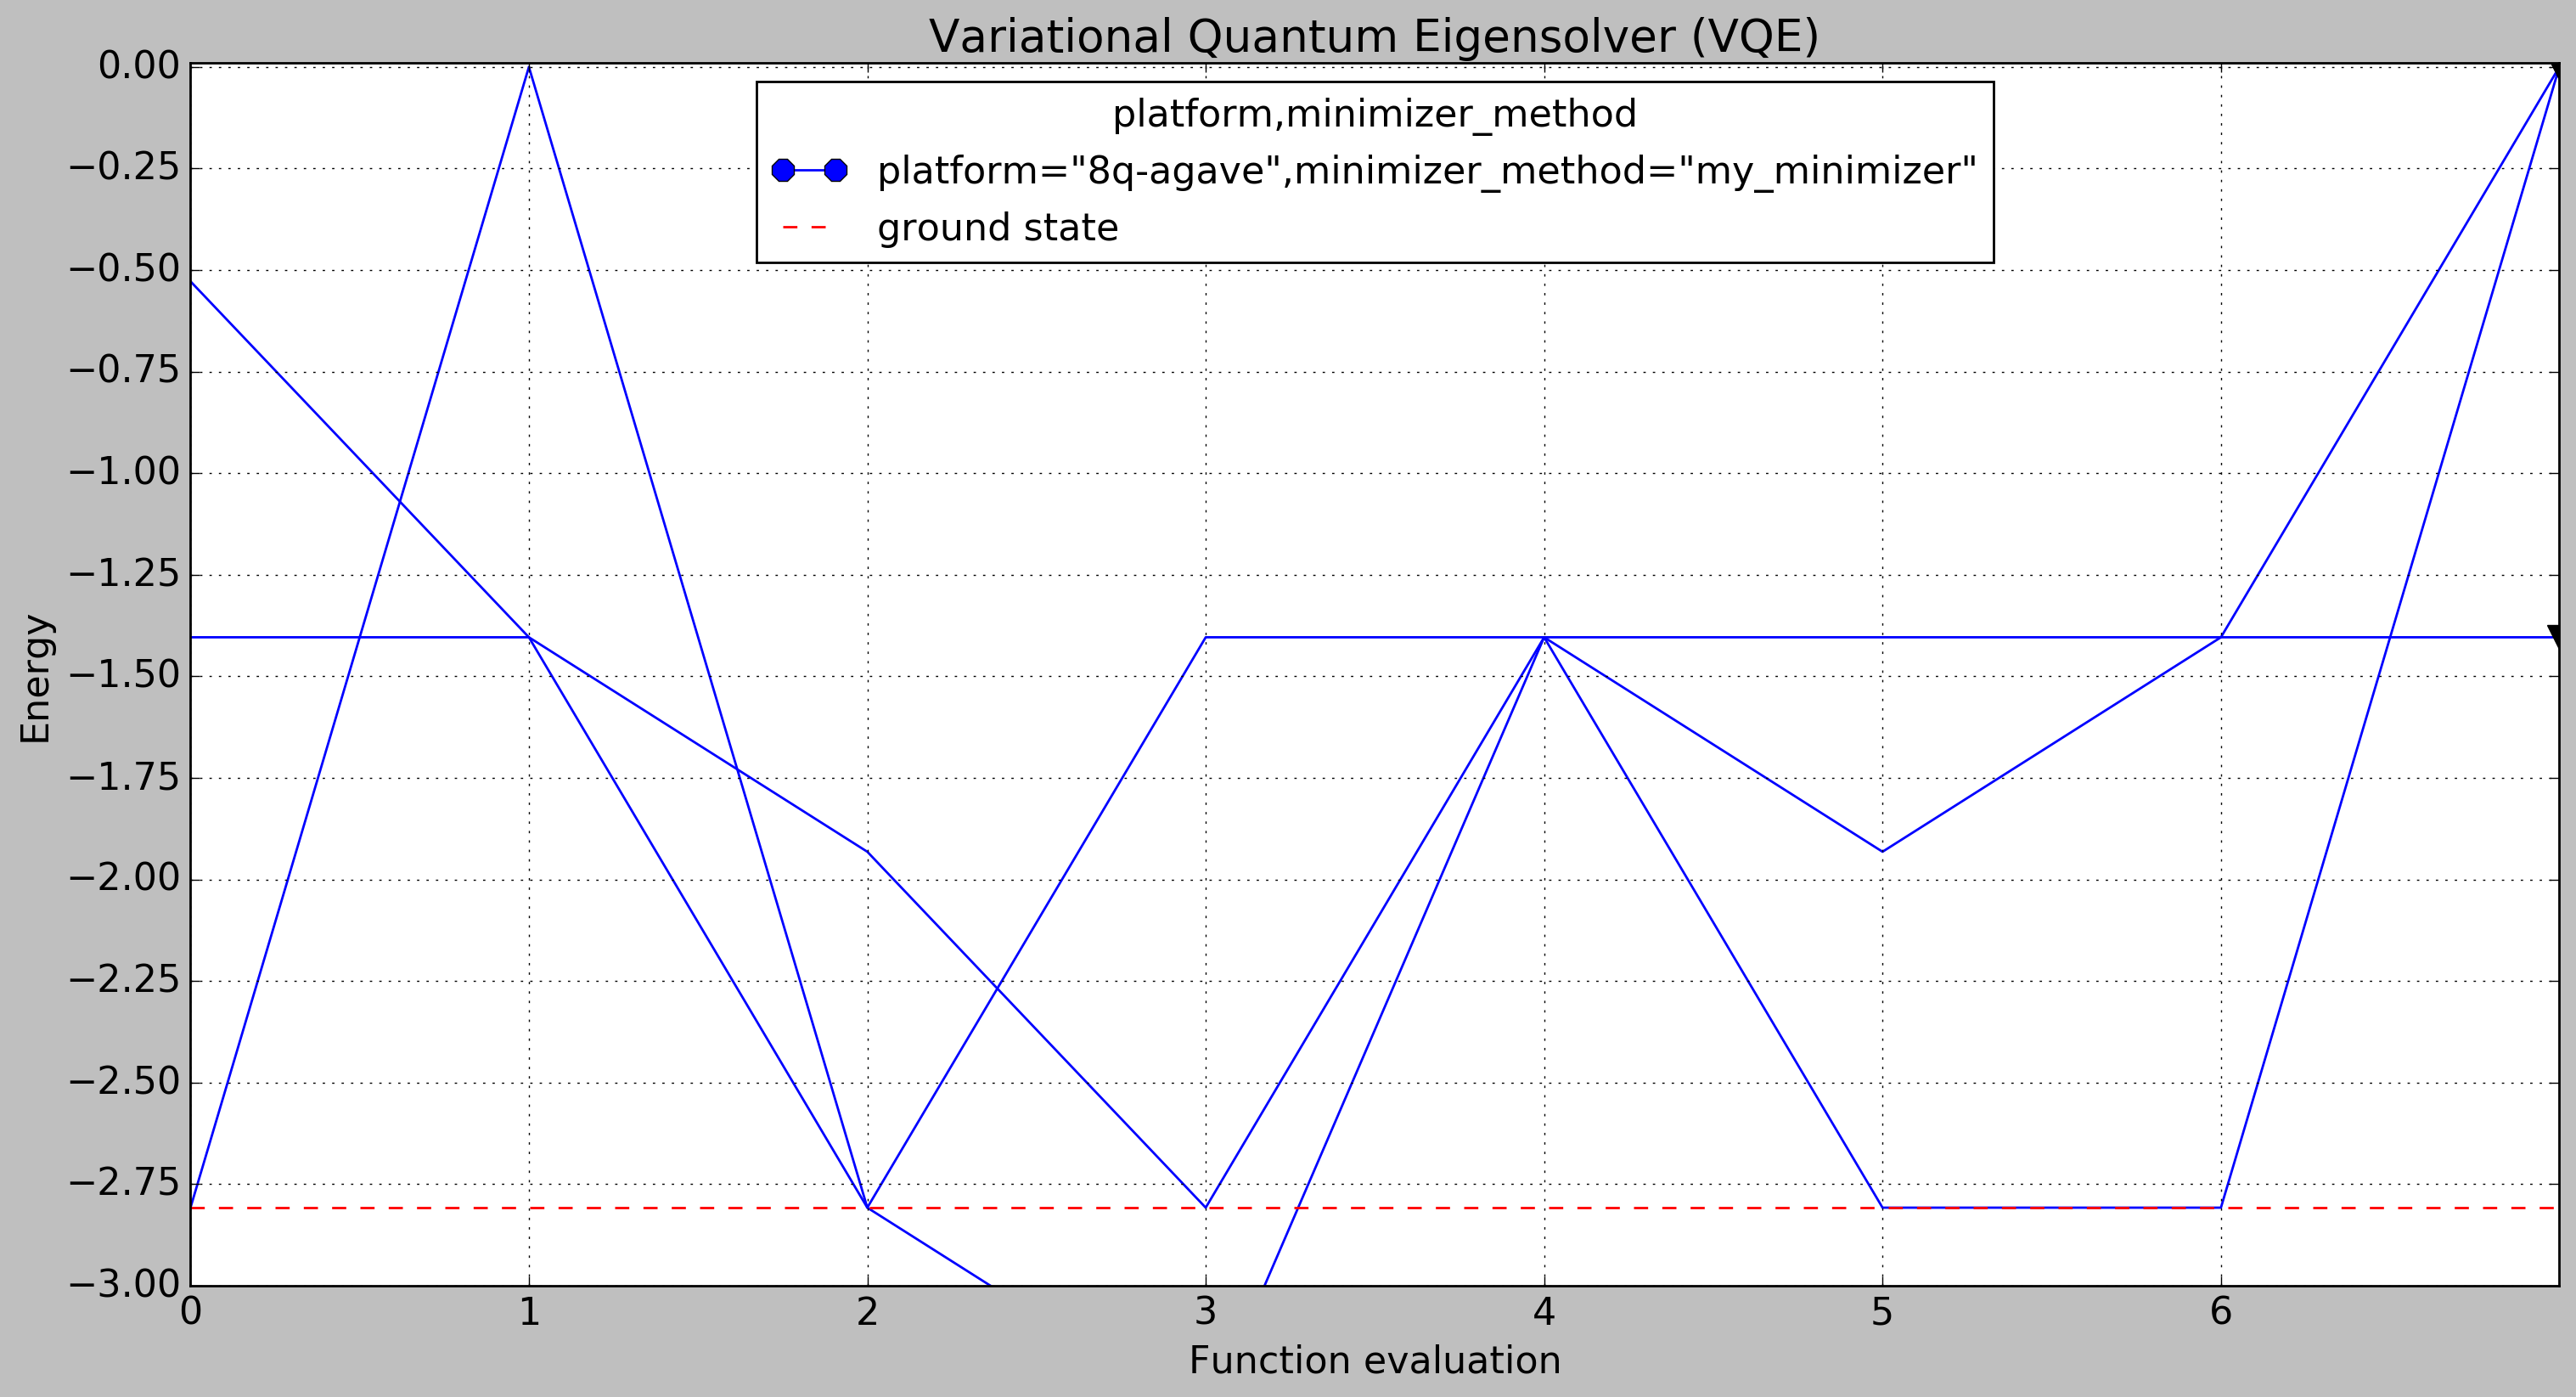

In [22]:
# Platform, Team, minimizer Function, number of Samples, number of function eValuations, Experiment, Repetition
(p,t,f,s,v,e) = idxmin1
# Plot the winner.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[idxmin1]))]],
     xmax=7, xstep=1, ymin=-3.00, ymax=0.00+0.01, legend_loc='upper center')

In [23]:
# Exclude the winner.
df_metrics = df_metrics.drop(idxmin1)

#### Explanation

The [Hamiltonian](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)) of [Helium](https://en.wikipedia.org/wiki/Helium) in the [STO-3G](https://en.wikipedia.org/wiki/STO-nG_basis_sets) basis is given by:

\begin{equation}
    H = -1.6678202144537553 + 0.7019459893849936 \cdot Z_0 + 0.7019459893849936 \cdot Z_1 + 0.263928235683768058 \cdot Z_0 \cdot Z_1
\end{equation}

Since the Hamiltonian consists of a sum of commuting operators ($Z_0$, $Z_1$, $Z_0\cdot Z1$), there exists a simultaneous eigenbasis (including the ground state) on which the value of each of the operators is $+1$ or $-1$. 

When `sample_number=1`, measuring an operator once in any state also results in $+1$ or $-1$. This implies that one get "lucky" with _any_ mininizer method even on noisy hardware. (Indeed, we have been able to reproduce this result with `my_nelder_mead`.)

For more complex molecules, the Hamiltonian is unlikely to consist of a sum of commuting operators, hence picking up a good optimizer and its parameters will be crucial for success.

### The (conditional) runner-up

The runner-up also used `sample_number=1` but only a single run (hence, it's a "conditional" runner-up, as we can determine the error only from multiple runs).

In [24]:
idxmin2 = df_metrics['T_ave'].idxmin()
idxmin2

(u'qvm', u'team-12', u'my_minimizer', 1, 1, '1f72b8e0f40fdb44')

In [25]:
df_metrics.loc[[idxmin2]]

T_ave  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44  284.0   

                                                                                 T_err  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44    0.0   

                                                                                 num_repetitions  \
platform team    minimizer_method sample_number max_iterations point                               
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44                1   

                                                                                   s  \
platform team    minimizer_method sample_number max_iterations point                   
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44  1.0   

                                                                                 s_err  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44    0.0   

                                                                                 t_ave  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44  284.0   

                                                                                 t_err  
platform team    minimizer_method sample_number max_iterations point                    
qvm      team-12 my_minimizer     1             1              1f72b8e0f40fdb44    0.0

In [26]:
df.loc[idxmin2]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.80778  -2.71276      -2.80778    {u'maxfev': 1}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_minimizer( func, x0, my_args=(), my_opt...   70   1   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 284, u'total_q_seconds': 74...   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'fun_validated': -2.80778395...   False   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     74.4332           284       116.381   

                                                      vqe_output  
repetition_id                                                     
0              {u'fun_validated': -2.80778395754, u'nfev': 70...

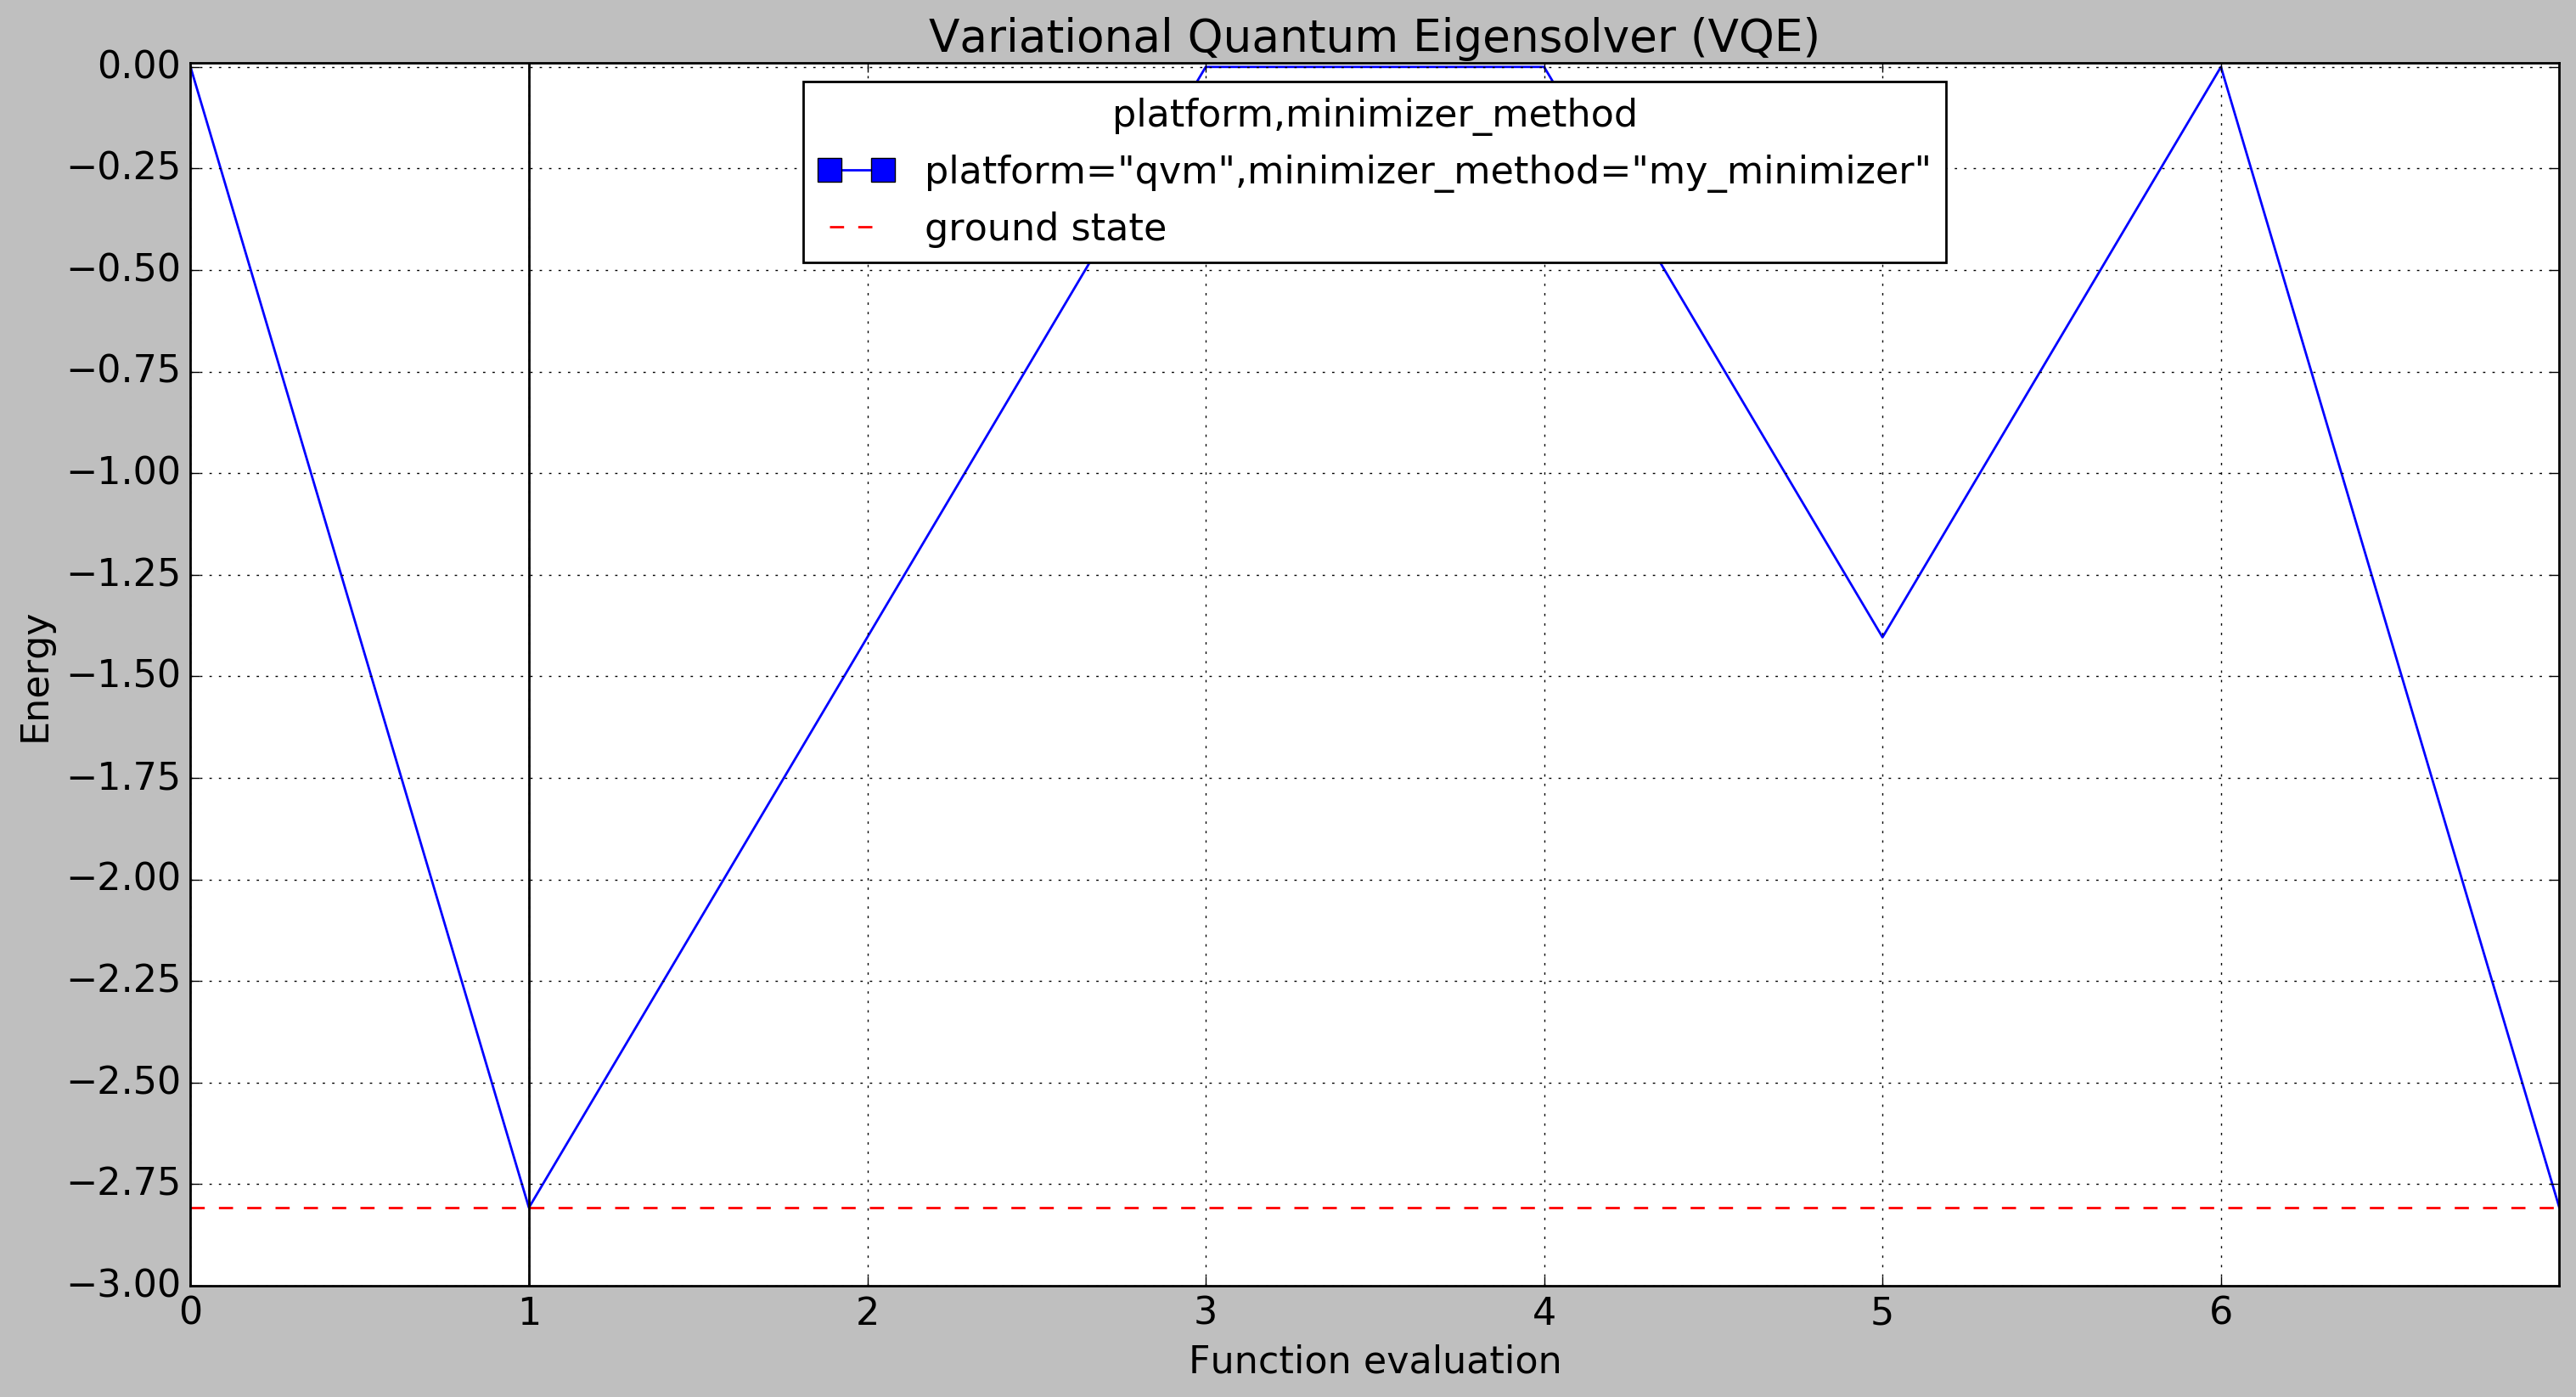

In [27]:
# Platform, Team, minimizer Function, number of Samples, number of function eValuations, Experiment, Repetition
(p,t,f,s,v,e) = idxmin2
# Plot the winner.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[idxmin2]))]],
     xmax=7, xstep=1, ymin=-3.00, ymax=0.00+0.01, legend_loc='upper center')

In [28]:
# Print the minimizer source.
print(df.loc[(p,t,f,s,v,e,0)]['minimizer_src'])

def my_minimizer( func, x0, my_args=(), my_options=None ):
    "Your own attempt at writing a stochastic minimizer"
    global invocations
    print("x0 is", x0)
    print("func is", inspect.getsource(func))
    para_func = mapf(func)
    invocations = 0
    def wp(*test):
        global invocations
        args = test[0][0]
        print("invoking with", args)
        ret = func(args, my_args)
        print("evaluated as", ret)
        invocations += SAMPLE_SZ
        return ret
    
    myProblem = GPyOpt.methods.BayesianOptimization(wp, domain=bounds,
                                                acquisition_type = 'MPI',
                                                initial_design_numdata = 30,
                                                Initial_design_type="latin",
                                                evaluator_type = 'local_penalization',
                                                num_cores=1, batch_size=1)
    myProblem.run_optimization(40)
    myProblem.

In [29]:
# Exclude the conditional runner-up.
df_metrics = df_metrics.drop(idxmin2)

### The QVM runner-up

In [30]:
platform_qvm = 'qvm'
df_metrics_qvm = df_metrics.loc[platform_qvm]
idxmin_qvm = df_metrics_qvm['T_ave'].idxmin()
idxmin_qvm

(u'team-03', u'my_cobyla', 5, 10, 'aa64cff4b1d94d38')

In [31]:
df_metrics.loc[platform_qvm].loc[[idxmin_qvm]]

T_ave  \
team    minimizer_method sample_number max_iterations point                     
team-03 my_cobyla        5             10             aa64cff4b1d94d38  400.0   

                                                                         T_err  \
team    minimizer_method sample_number max_iterations point                      
team-03 my_cobyla        5             10             aa64cff4b1d94d38  1000.0   

                                                                        num_repetitions  \
team    minimizer_method sample_number max_iterations point                               
team-03 my_cobyla        5             10             aa64cff4b1d94d38                3   

                                                                               s  \
team    minimizer_method sample_number max_iterations point                        
team-03 my_cobyla        5             10             aa64cff4b1d94d38  0.333333   

                                                                           s_err  \
team    minimizer_method sample_number max_iterations point                        
team-03 my_cobyla        5             10             aa64cff4b1d94d38  0.272166   

                                                                        t_ave  \
team    minimizer_method sample_number max_iterations point                     
team-03 my_cobyla        5             10             aa64cff4b1d94d38  200.0   

                                                                        t_err  
team    minimizer_method sample_number max_iterations point                    
team-03 my_cobyla        5             10             aa64cff4b1d94d38    0.0

In [32]:
df.loc[platform_qvm].loc[idxmin_qvm]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.80778  -2.57372      -2.80778  {u'maxiter': 10}   
1             -2.80778  -2.57372      -2.52701  {u'maxiter': 10}   
2             -2.80778  -2.80174      -2.80778  {u'maxiter': 10}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_cobyla( func, x0, my_args=(), my_option...   10  -1   
1              def my_cobyla( func, x0, my_args=(), my_option...   10  -1   
2              def my_cobyla( func, x0, my_args=(), my_option...   10  -1   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 200, u'total_q_seconds': 8....   
1              {u'total_q_shots': 200, u'total_q_seconds': 8....   
2              {u'total_q_shots': 200, u'total_q_seconds': 8....   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'status': 2, u'maxcv': 0.0, ...   False   
1              {u'vqe_output': {u'status': 2, u'maxcv': 0.0, ...   False   
2              {u'vqe_output': {u'status': 2, u'maxcv': 0.0, ...   False   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                      8.9148           200       8.96425   
1                     8.49102           200       8.55271   
2                        8.07           200       8.10312   

                                                      vqe_output  
repetition_id                                                     
0              {u'status': 2, u'maxcv': 0.0, u'success': Fals...  
1              {u'status': 2, u'maxcv': 0.0, u'success': Fals...  
2              {u'status': 2, u'maxcv': 0.0, u'success': Fals...

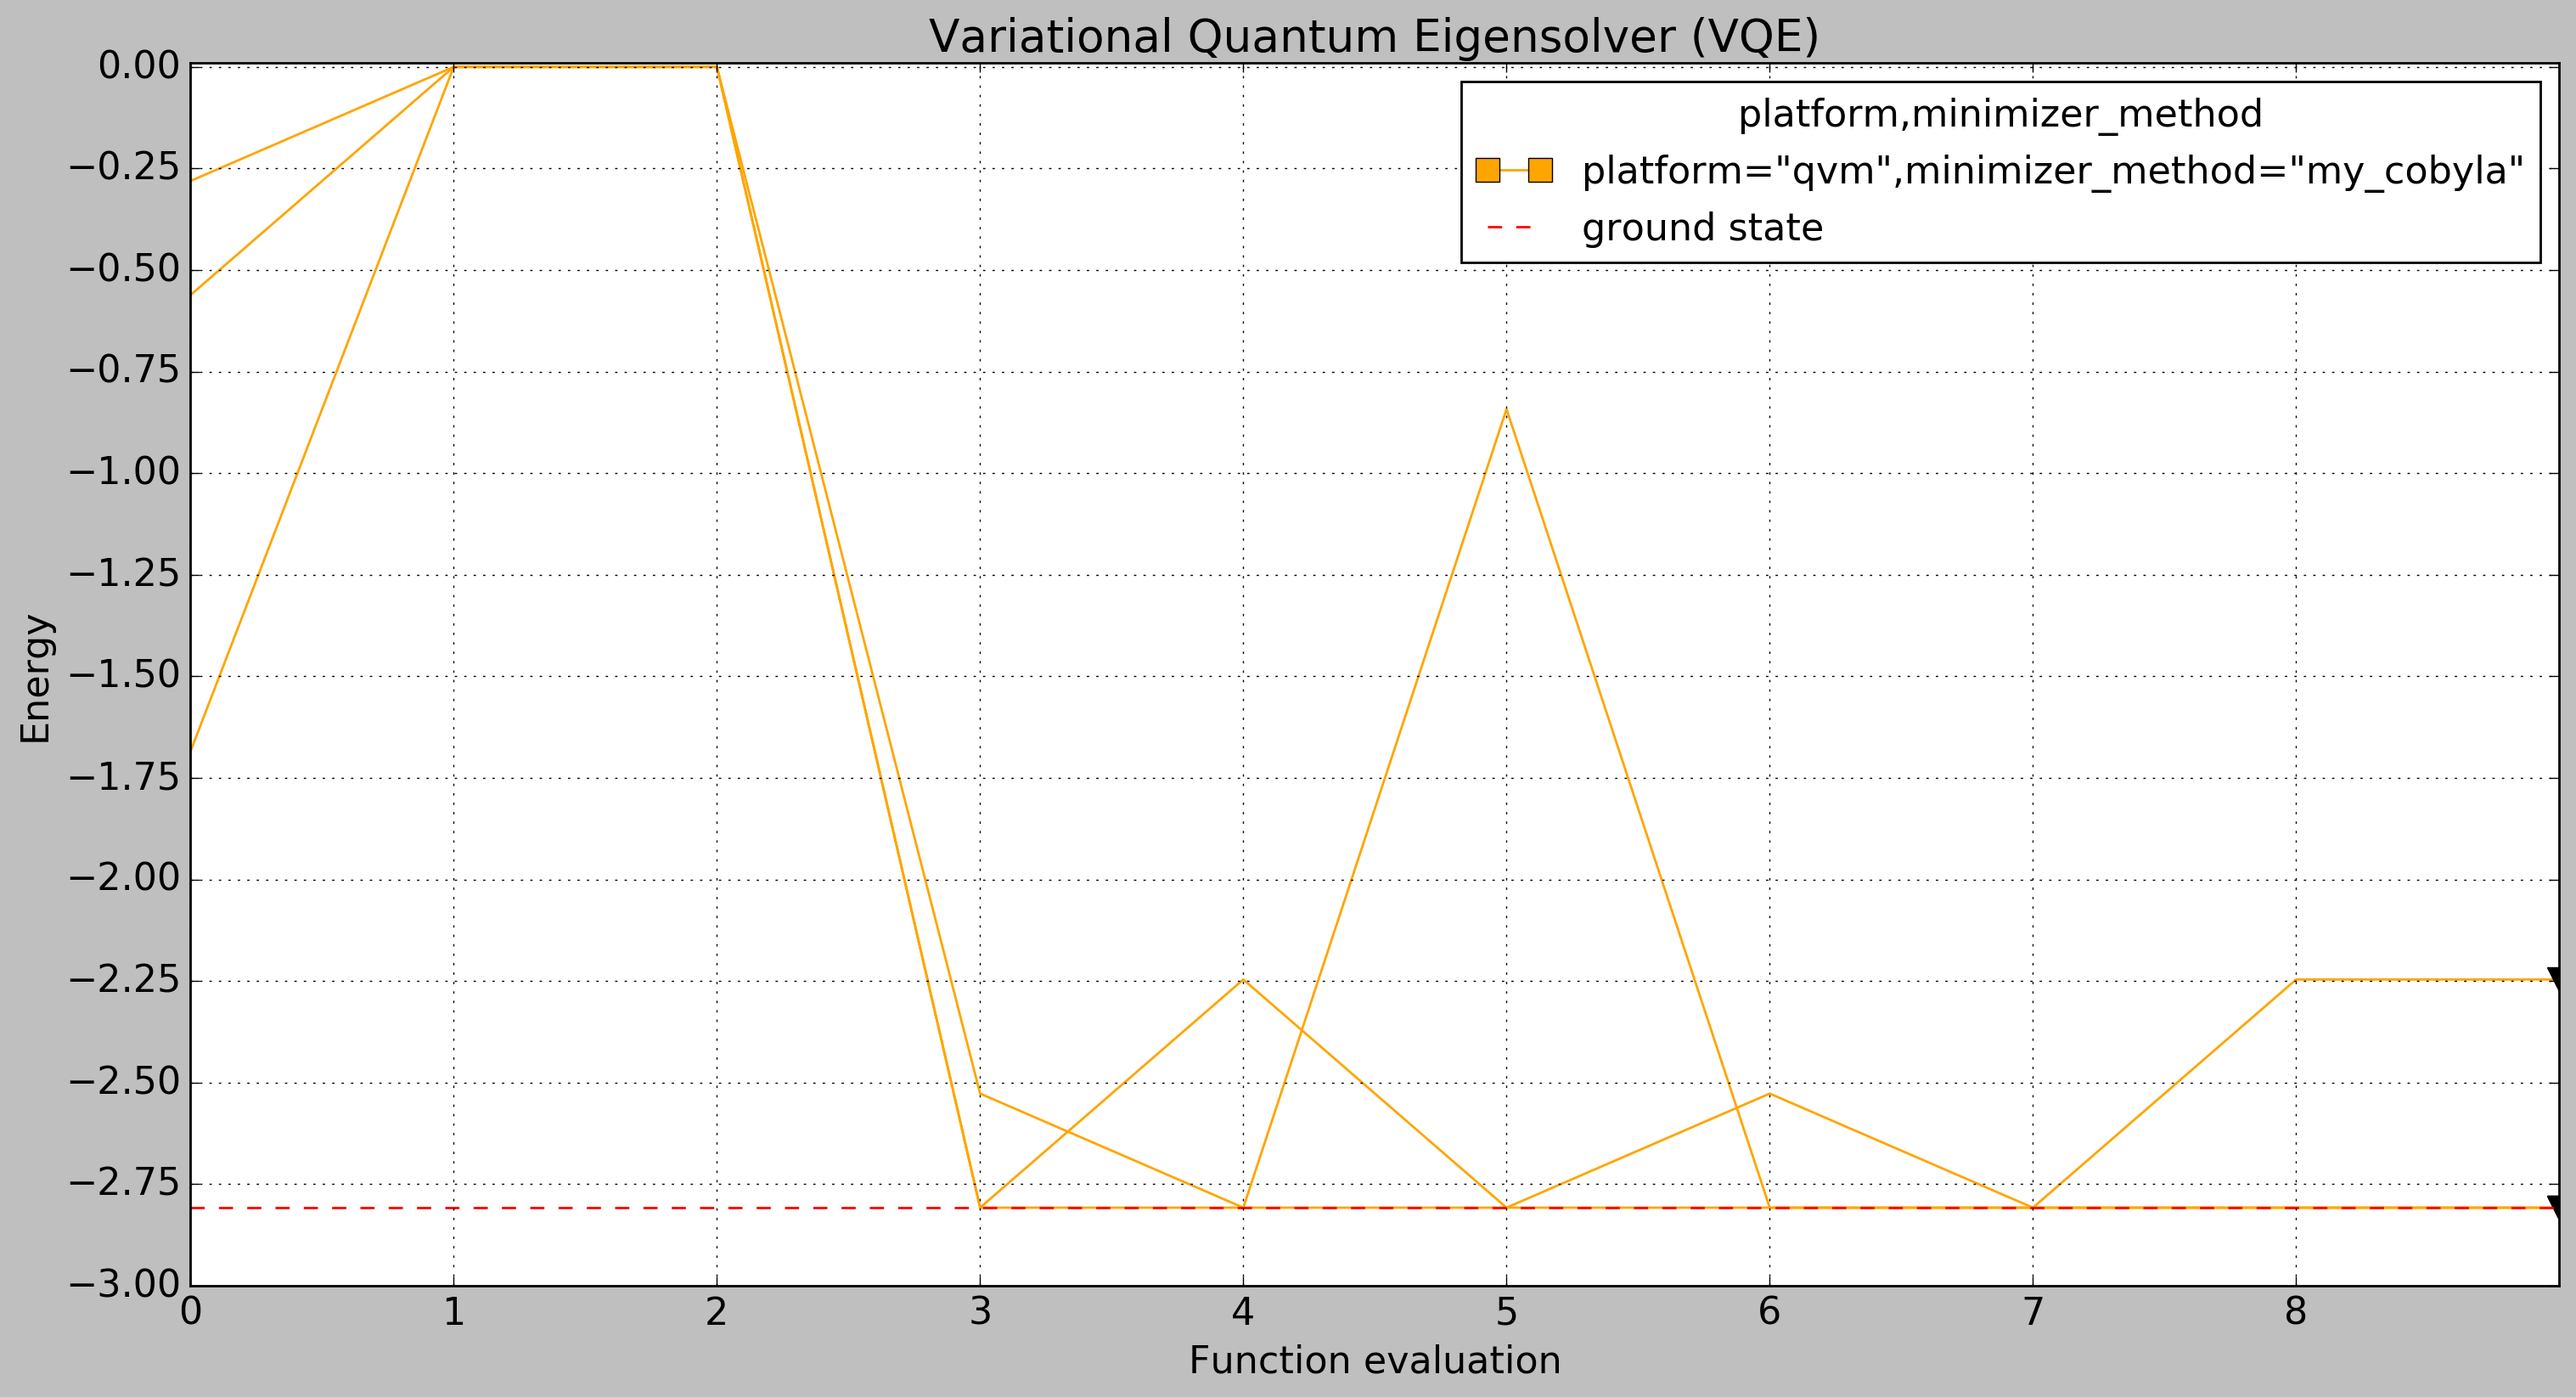

In [33]:
# Platform, Team, minimizer Function, number of Samples, number of function eValuations, Experiment, Repetition
p = platform_qvm
(t,f,s,v,e) = idxmin_qvm
# Plot the runner up.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[(p,t,f,s,v,e)]))]],
     xmax=9, xstep=1, ymin=-3.00, ymax=0.00+0.01, legend_loc='upper right')

In [34]:
# Print the minimizer source.
print(df.loc[(p,t,f,s,v,e,0)]['minimizer_src'])

def my_cobyla( func, x0, my_args=(), my_options=None ):         # another non-stochastic minimizer for comparison
    "COBYLA optimizer from SciPy library"

    return minimize( func, x0, method='COBYLA', options=my_options, args=my_args )



In [35]:
# Exclude the QVM runner-up.
df_metrics = df_metrics.drop((p,t,f,s,v,e))

### The QPU runner-up

In [36]:
platform_qpu = '8q-agave'
df_metrics_qpu = df_metrics.loc[platform_qpu]
idxmin_qpu = df_metrics_qpu['T_ave'].idxmin()
idxmin_qpu

(u'team-10', u'my_minimizer', 10, 8, 'a3842f89879d0961')

In [37]:
df_metrics_qpu.loc[[idxmin_qpu]]

T_ave  \
team    minimizer_method sample_number max_iterations point                     
team-10 my_minimizer     10            8              a3842f89879d0961  640.0   

                                                                         T_err  \
team    minimizer_method sample_number max_iterations point                      
team-10 my_minimizer     10            8              a3842f89879d0961  1600.0   

                                                                        num_repetitions  \
team    minimizer_method sample_number max_iterations point                               
team-10 my_minimizer     10            8              a3842f89879d0961                3   

                                                                               s  \
team    minimizer_method sample_number max_iterations point                        
team-10 my_minimizer     10            8              a3842f89879d0961  0.333333   

                                                                           s_err  \
team    minimizer_method sample_number max_iterations point                        
team-10 my_minimizer     10            8              a3842f89879d0961  0.272166   

                                                                        t_ave  \
team    minimizer_method sample_number max_iterations point                     
team-10 my_minimizer     10            8              a3842f89879d0961  320.0   

                                                                        t_err  
team    minimizer_method sample_number max_iterations point                    
team-10 my_minimizer     10            8              a3842f89879d0961    0.0

In [38]:
df.loc[platform_qpu].loc[idxmin_qpu]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -3.01893  -2.43453      -2.51016    {u'maxfev': 8}   
1             -2.22938  -2.71485      -2.36977    {u'maxfev': 8}   
2             -2.51016  -2.49231      -1.79024    {u'maxfev': 8}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   
1              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   
2              def my_minimizer( func, x0, my_args=(), my_opt...    8   8   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 320, u'total_q_seconds': 49...   
1              {u'total_q_shots': 320, u'total_q_seconds': 10...   
2              {u'total_q_shots': 320, u'total_q_seconds': 51...   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'fun_validated': -2.51015540...   False   
1              {u'vqe_output': {u'fun_validated': -2.36976620...   False   
2              {u'vqe_output': {u'fun_validated': -1.79024166...   False   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     49.4448           320       49.4587   
1                     109.043           320       109.057   
2                     51.8971           320       82.2221   

                                                      vqe_output  
repetition_id                                                     
0              {u'fun_validated': -2.51015540172, u'nfev': 8,...  
1              {u'fun_validated': -2.36976620384, u'nfev': 8,...  
2              {u'fun_validated': -1.7902416688, u'nfev': 8, ...

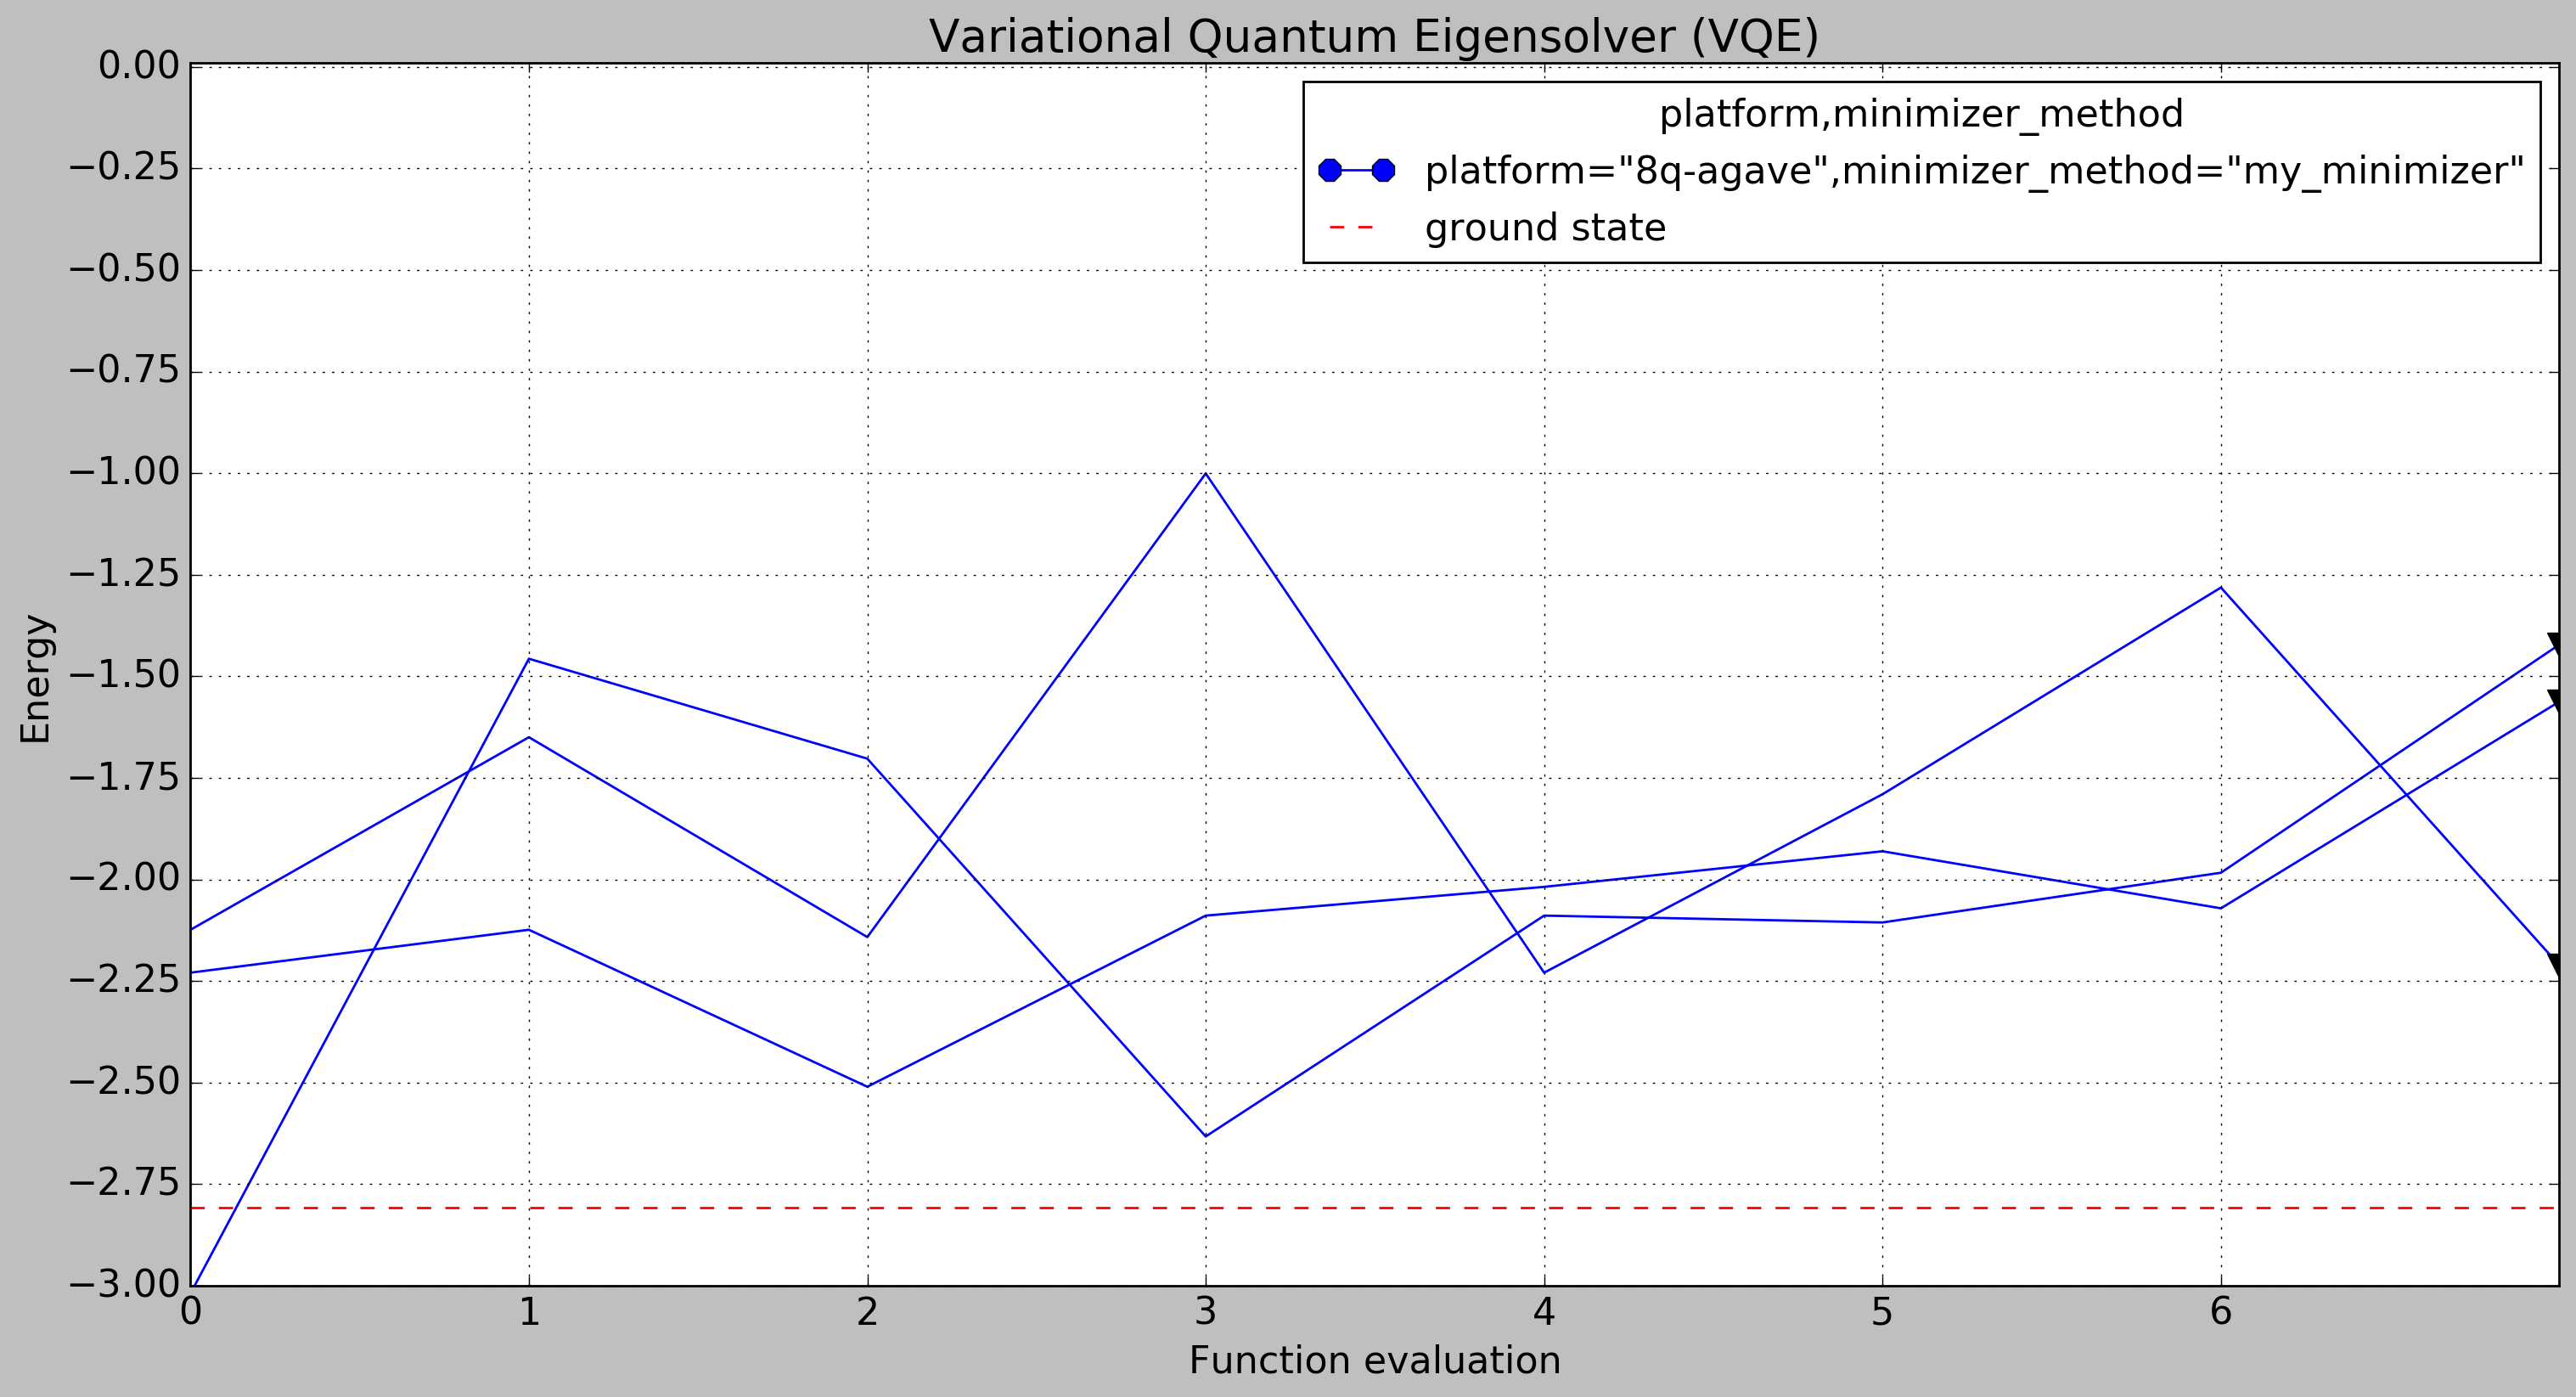

In [39]:
# Platform, Team, Experiment, minimizer Function, number of Samples, number of function eValuations, Repetition
p = platform_qpu
(t,f,s,v,e) = idxmin_qpu
# Plot the QPU runner-up.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[(p,t,f,s,v,e)]))]],
     xmax=7, xstep=1, ymin=-3.00, ymax=-0.00+0.01, legend_loc='upper right')

In [40]:
# Print the minimizer source.
print(df.loc[(p,t,f,s,v,e,0)]['minimizer_src'])

def my_minimizer( func, x0, my_args=(), my_options=None ):
    "Your own attempt at writing a stochastic minimizer"

    my_options      = my_options or {}
    points          = my_options.get('maxfev', 30)              # by default perform 30 function evaluations
    num_parameters  = len(x0)                                   # get number of parameters needed for objective function

    flist = [0.]
    xlist = []
    t = 0.001

    for i in range(points):
        x = [random.random() for i in range(num_parameters)]    # initialise parameters randomly from uniform distribution
        fnew = func(x, my_args)
        flist.append(fnew)
        xlist.append(x)

        # SA Algorithm
        d = flist[i+1] - flist[i]
        psa = np.exp(-d/t)

        if d < 0.0:
            flist[i] = np.copy(flist[i+1])
        else:
            if psa>np.random.random():
                flist[i] = np.copy(flist[i+1])
            else:
                x = [random.random() for i in range(num_parameter

In [41]:
# Exclude the QPU runner-up.
df_metrics = df_metrics.drop((p,t,f,s,v,e))

### The best entry with 100% convergence (prob=0.999)

In [42]:
df_metrics_prob100 = get_metrics(df, delta=0.1, prob=0.999, which_fun_key='fun_exact', which_time_key='total_q_shots')
df_metrics_prob100 = df_metrics_prob100[(df_metrics_prob100['s']==1) & (df_metrics_prob100['num_repetitions']>1)]

In [43]:
idxmin_prob100 = df_metrics_prob100['T_ave'].idxmin()
idxmin_prob100

(u'qvm', u'team-09', u'my_cobyla', 18, 80, '629ceefcd1714629')

In [44]:
df_metrics_prob100.loc[[idxmin_prob100]]

T_ave  \
platform team    minimizer_method sample_number max_iterations point                      
qvm      team-09 my_cobyla        18            80             629ceefcd1714629  1584.0   

                                                                                      T_err  \
platform team    minimizer_method sample_number max_iterations point                          
qvm      team-09 my_cobyla        18            80             629ceefcd1714629  179.599555   

                                                                                 num_repetitions  \
platform team    minimizer_method sample_number max_iterations point                               
qvm      team-09 my_cobyla        18            80             629ceefcd1714629                3   

                                                                                   s  \
platform team    minimizer_method sample_number max_iterations point                   
qvm      team-09 my_cobyla        18            80             629ceefcd1714629  1.0   

                                                                                 s_err  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-09 my_cobyla        18            80             629ceefcd1714629    0.0   

                                                                                  t_ave  \
platform team    minimizer_method sample_number max_iterations point                      
qvm      team-09 my_cobyla        18            80             629ceefcd1714629  1584.0   

                                                                                      t_err  
platform team    minimizer_method sample_number max_iterations point                         
qvm      team-09 my_cobyla        18            80             629ceefcd1714629  179.599555

In [45]:
df.loc[idxmin_prob100]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.80778  -2.71476      -2.80778  {u'maxiter': 80}   
1             -2.80778  -2.79107      -2.80778  {u'maxiter': 80}   
2             -2.80778  -2.79924      -2.80778  {u'maxiter': 80}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_cobyla( func, x0, my_args=(), my_option...   28  -1   
1              def my_cobyla( func, x0, my_args=(), my_option...   20  -1   
2              def my_cobyla( func, x0, my_args=(), my_option...   18  -1   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 2016, u'total_q_seconds': 2...   
1              {u'total_q_shots': 1440, u'total_q_seconds': 1...   
2              {u'total_q_shots': 1296, u'total_q_seconds': 1...   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   
1              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   
2              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     27.1409          2016       27.2655   
1                     19.1101          1440       19.1999   
2                     17.3081          1296       17.3906   

                                                      vqe_output  
repetition_id                                                     
0              {u'status': 1, u'maxcv': 0.0, u'success': True...  
1              {u'status': 1, u'maxcv': 0.0, u'success': True...  
2              {u'status': 1, u'maxcv': 0.0, u'success': True...

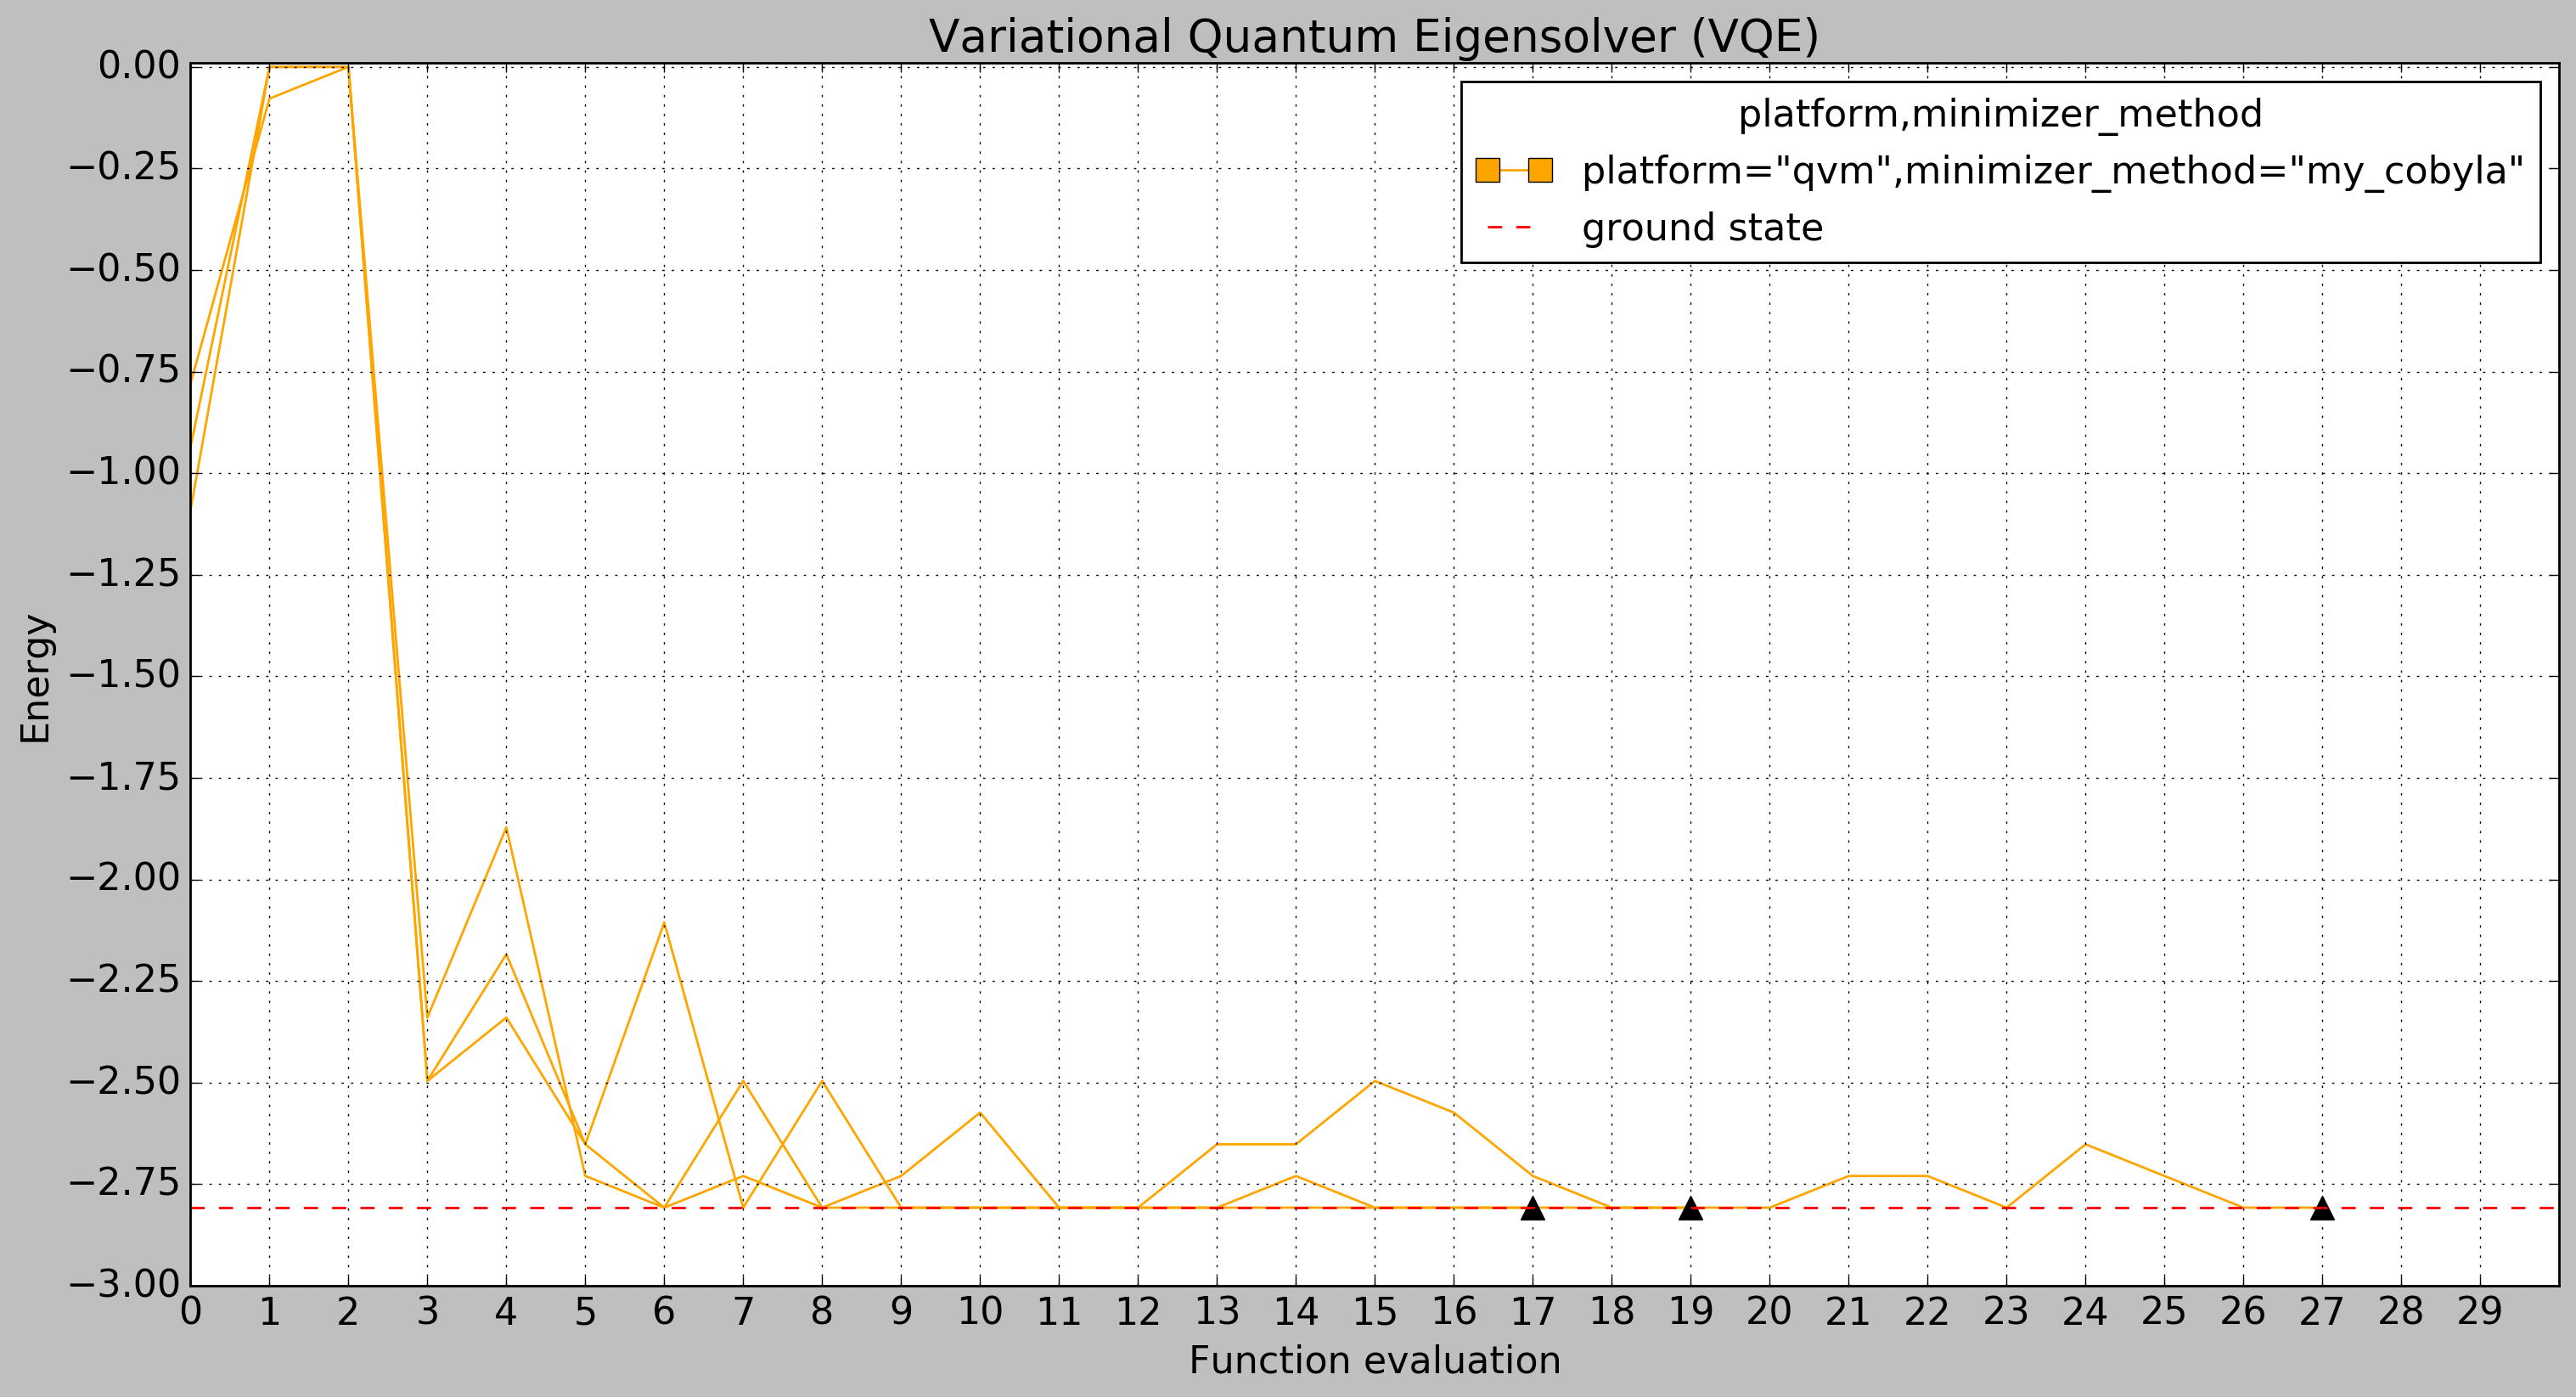

In [46]:
# Platform, Team, Experiment, minimizer Function, number of Samples, number of function eValuations, Repetition
(p,t,f,s,v,e) = idxmin_prob100
# Plot.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[(p,t,f,s,v,e)]))]],
     xmax=30, xstep=1, ymin=-3.00, ymax=-0.00+0.01, legend_loc='upper right')

### The worst entry with 100% convergence (prob=0.999)

In [47]:
idxmax_prob100 = df_metrics_prob100['T_ave'].idxmax()
idxmax_prob100

(u'8q-agave', u'team-07', u'my_cobyla', 150, 80, '27bd6b1f8844e4a4')

In [48]:
df_metrics_prob100.loc[[idxmax_prob100]]

T_ave  \
platform team    minimizer_method sample_number max_iterations point                       
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4  18800.0   

                                                                                      T_err  \
platform team    minimizer_method sample_number max_iterations point                          
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4  163.299316   

                                                                                 num_repetitions  \
platform team    minimizer_method sample_number max_iterations point                               
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4                3   

                                                                                   s  \
platform team    minimizer_method sample_number max_iterations point                   
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4  1.0   

                                                                                 s_err  \
platform team    minimizer_method sample_number max_iterations point                     
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4    0.0   

                                                                                   t_ave  \
platform team    minimizer_method sample_number max_iterations point                       
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4  18800.0   

                                                                                      t_err  
platform team    minimizer_method sample_number max_iterations point                         
8q-agave team-07 my_cobyla        150           80             27bd6b1f8844e4a4  163.299316

In [49]:
df.loc[idxmax_prob100]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.19651  -2.80078      -2.20924  {u'maxiter': 80}   
1             -2.20819  -2.79951      -2.27849  {u'maxiter': 80}   
2              -2.0234  -2.80312      -2.23514  {u'maxiter': 80}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_cobyla( func, x0, my_args=(), my_option...   32  -1   
1              def my_cobyla( func, x0, my_args=(), my_option...   31  -1   
2              def my_cobyla( func, x0, my_args=(), my_option...   31  -1   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 19200, u'total_q_seconds': ...   
1              {u'total_q_shots': 18600, u'total_q_seconds': ...   
2              {u'total_q_shots': 18600, u'total_q_seconds': ...   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   
1              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   
2              {u'vqe_output': {u'status': 1, u'maxcv': 0.0, ...    True   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     253.491         19200       253.973   
1                     236.087         18600       327.784   
2                     220.162         18600       220.468   

                                                      vqe_output  
repetition_id                                                     
0              {u'status': 1, u'maxcv': 0.0, u'success': True...  
1              {u'status': 1, u'maxcv': 0.0, u'success': True...  
2              {u'status': 1, u'maxcv': 0.0, u'success': True...

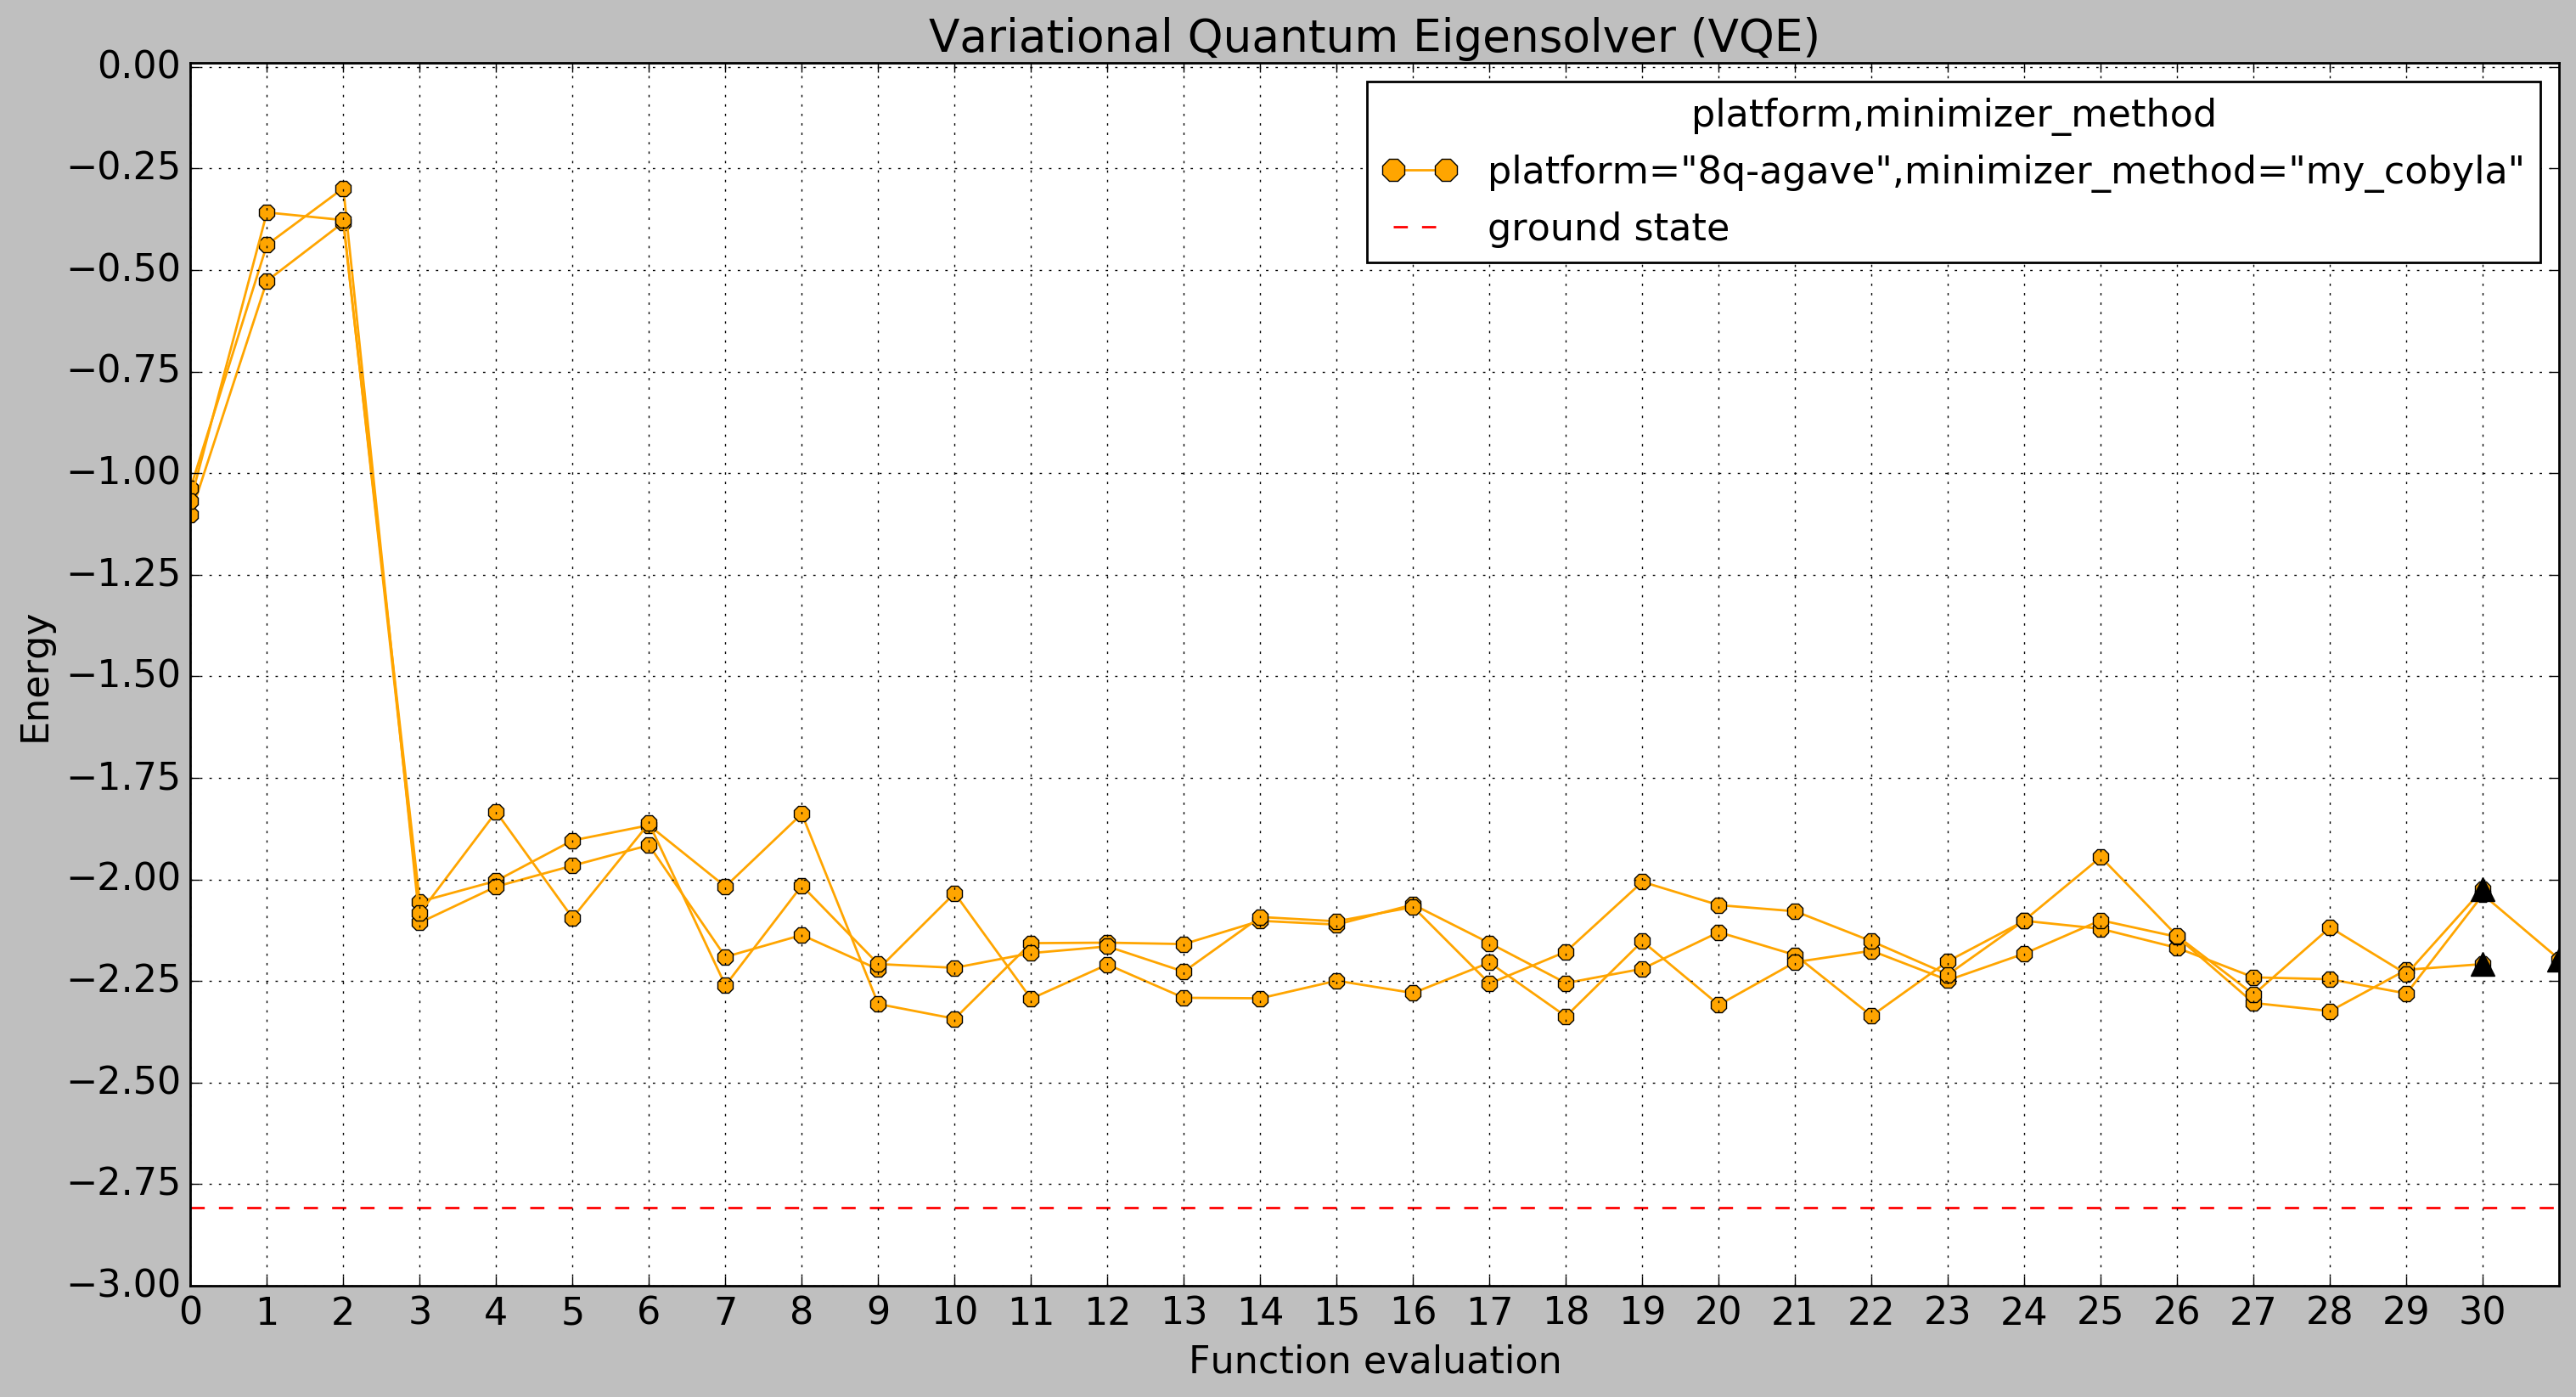

In [50]:
# Platform, Team, Experiment, minimizer Function, number of Samples, number of function eValuations, Repetition
(p,t,f,s,v,e) = idxmax_prob100
# Plot.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[(p,t,f,s,v,e)]))]],
     xmax=31, xstep=1, ymin=-3.00, ymax=-0.00+0.01, legend_loc='upper right')

In [51]:
# The ratio of the worst of the best with 100% convergence.
df_metrics_prob100.loc[idxmax_prob100]['T_ave'] / df_metrics_prob100.loc[idxmin_prob100]['T_ave']

11.868686868686869

In [52]:
# Exclude the best entry with 100% convergence.
df_metrics_prob100 = df_metrics_prob100.drop(idxmin_prob100)

### The most accurate entry (also the runner-up with 100% convergence!)

In [53]:
df_metrics_delta0 = get_metrics(df, delta=0.01, prob=0.999, which_fun_key='fun_exact', which_time_key='total_q_shots')
df_metrics_delta0 = df_metrics_delta0[(df_metrics_delta0['num_repetitions']>1)]

In [54]:
idxmin_delta0 = df_metrics_delta0['T_ave'].idxmin()
idxmin_delta0

(u'qvm', u'team-13', u'my_grid_sampler', 50, -1, '80a6ae5dc4c96a97')

In [55]:
# Also, the runner-up entry with 100% convergence!
idxmin_prob100 = df_metrics_prob100['T_ave'].idxmin()
idxmin_prob100

(u'qvm', u'team-13', u'my_grid_sampler', 50, -1, '80a6ae5dc4c96a97')

In [56]:
df_metrics_delta0.loc[[idxmin_delta0]]

T_ave  \
platform team    minimizer_method sample_number max_iterations point                      
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97  2000.0   

                                                                                 T_err  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97    0.0   

                                                                                 num_repetitions  \
platform team    minimizer_method sample_number max_iterations point                               
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97               11   

                                                                                   s  \
platform team    minimizer_method sample_number max_iterations point                   
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97  1.0   

                                                                                 s_err  \
platform team    minimizer_method sample_number max_iterations point                     
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97    0.0   

                                                                                  t_ave  \
platform team    minimizer_method sample_number max_iterations point                      
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97  2000.0   

                                                                                 t_err  
platform team    minimizer_method sample_number max_iterations point                    
qvm      team-13 my_grid_sampler  50            -1             80a6ae5dc4c96a97    0.0

In [57]:
df.loc[idxmin_delta0]

fun fun_exact fun_validated minimizer_options  \
repetition_id                                                      
0             -2.80778  -2.80777      -2.80778                {}   
1             -2.80778  -2.80778      -2.80778                {}   
2             -2.80778  -2.80777      -2.80778                {}   
3             -2.80778  -2.80778      -2.80778                {}   
4             -2.80778  -2.80778      -2.80778                {}   
5             -2.80778  -2.80776      -2.80778                {}   
6             -2.80778  -2.80777      -2.80778                {}   
7             -2.80778  -2.80778      -2.80778                {}   
8             -2.80778  -2.80773      -2.80778                {}   
9             -2.80778  -2.80778      -2.80778                {}   
10            -2.80778  -2.80777      -2.80778                {}   

                                                   minimizer_src nfev nit  \
repetition_id                                                               
0              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
1              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
2              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
3              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
4              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
5              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
6              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
7              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
8              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
9              def my_grid_sampler( func, x0, my_args=(), my_...    9   9   
10             def my_grid_sampler( func, x0, my_args=(), my_...    9   9   

                                                          report  \
repetition_id                                                      
0              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
1              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
2              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
3              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
4              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
5              {u'total_q_shots': 2000, u'total_q_seconds': 9...   
6              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
7              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
8              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
9              {u'total_q_shots': 2000, u'total_q_seconds': 1...   
10             {u'total_q_shots': 2000, u'total_q_seconds': 1...   

                                                             run success  \
repetition_id                                                              
0              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
1              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
2              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
3              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
4              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
5              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
6              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
7              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
8              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
9              {u'vqe_output': {u'fun_validated': -2.80778395...   False   
10             {u'vqe_output': {u'fun_validated': -2.80778395...   False   

              total_q_seconds total_q_shots total_seconds  \
repetition_id                                               
0                     10.8516          2000       10.9098   
1                     13.1785          2000        13.242   
2             

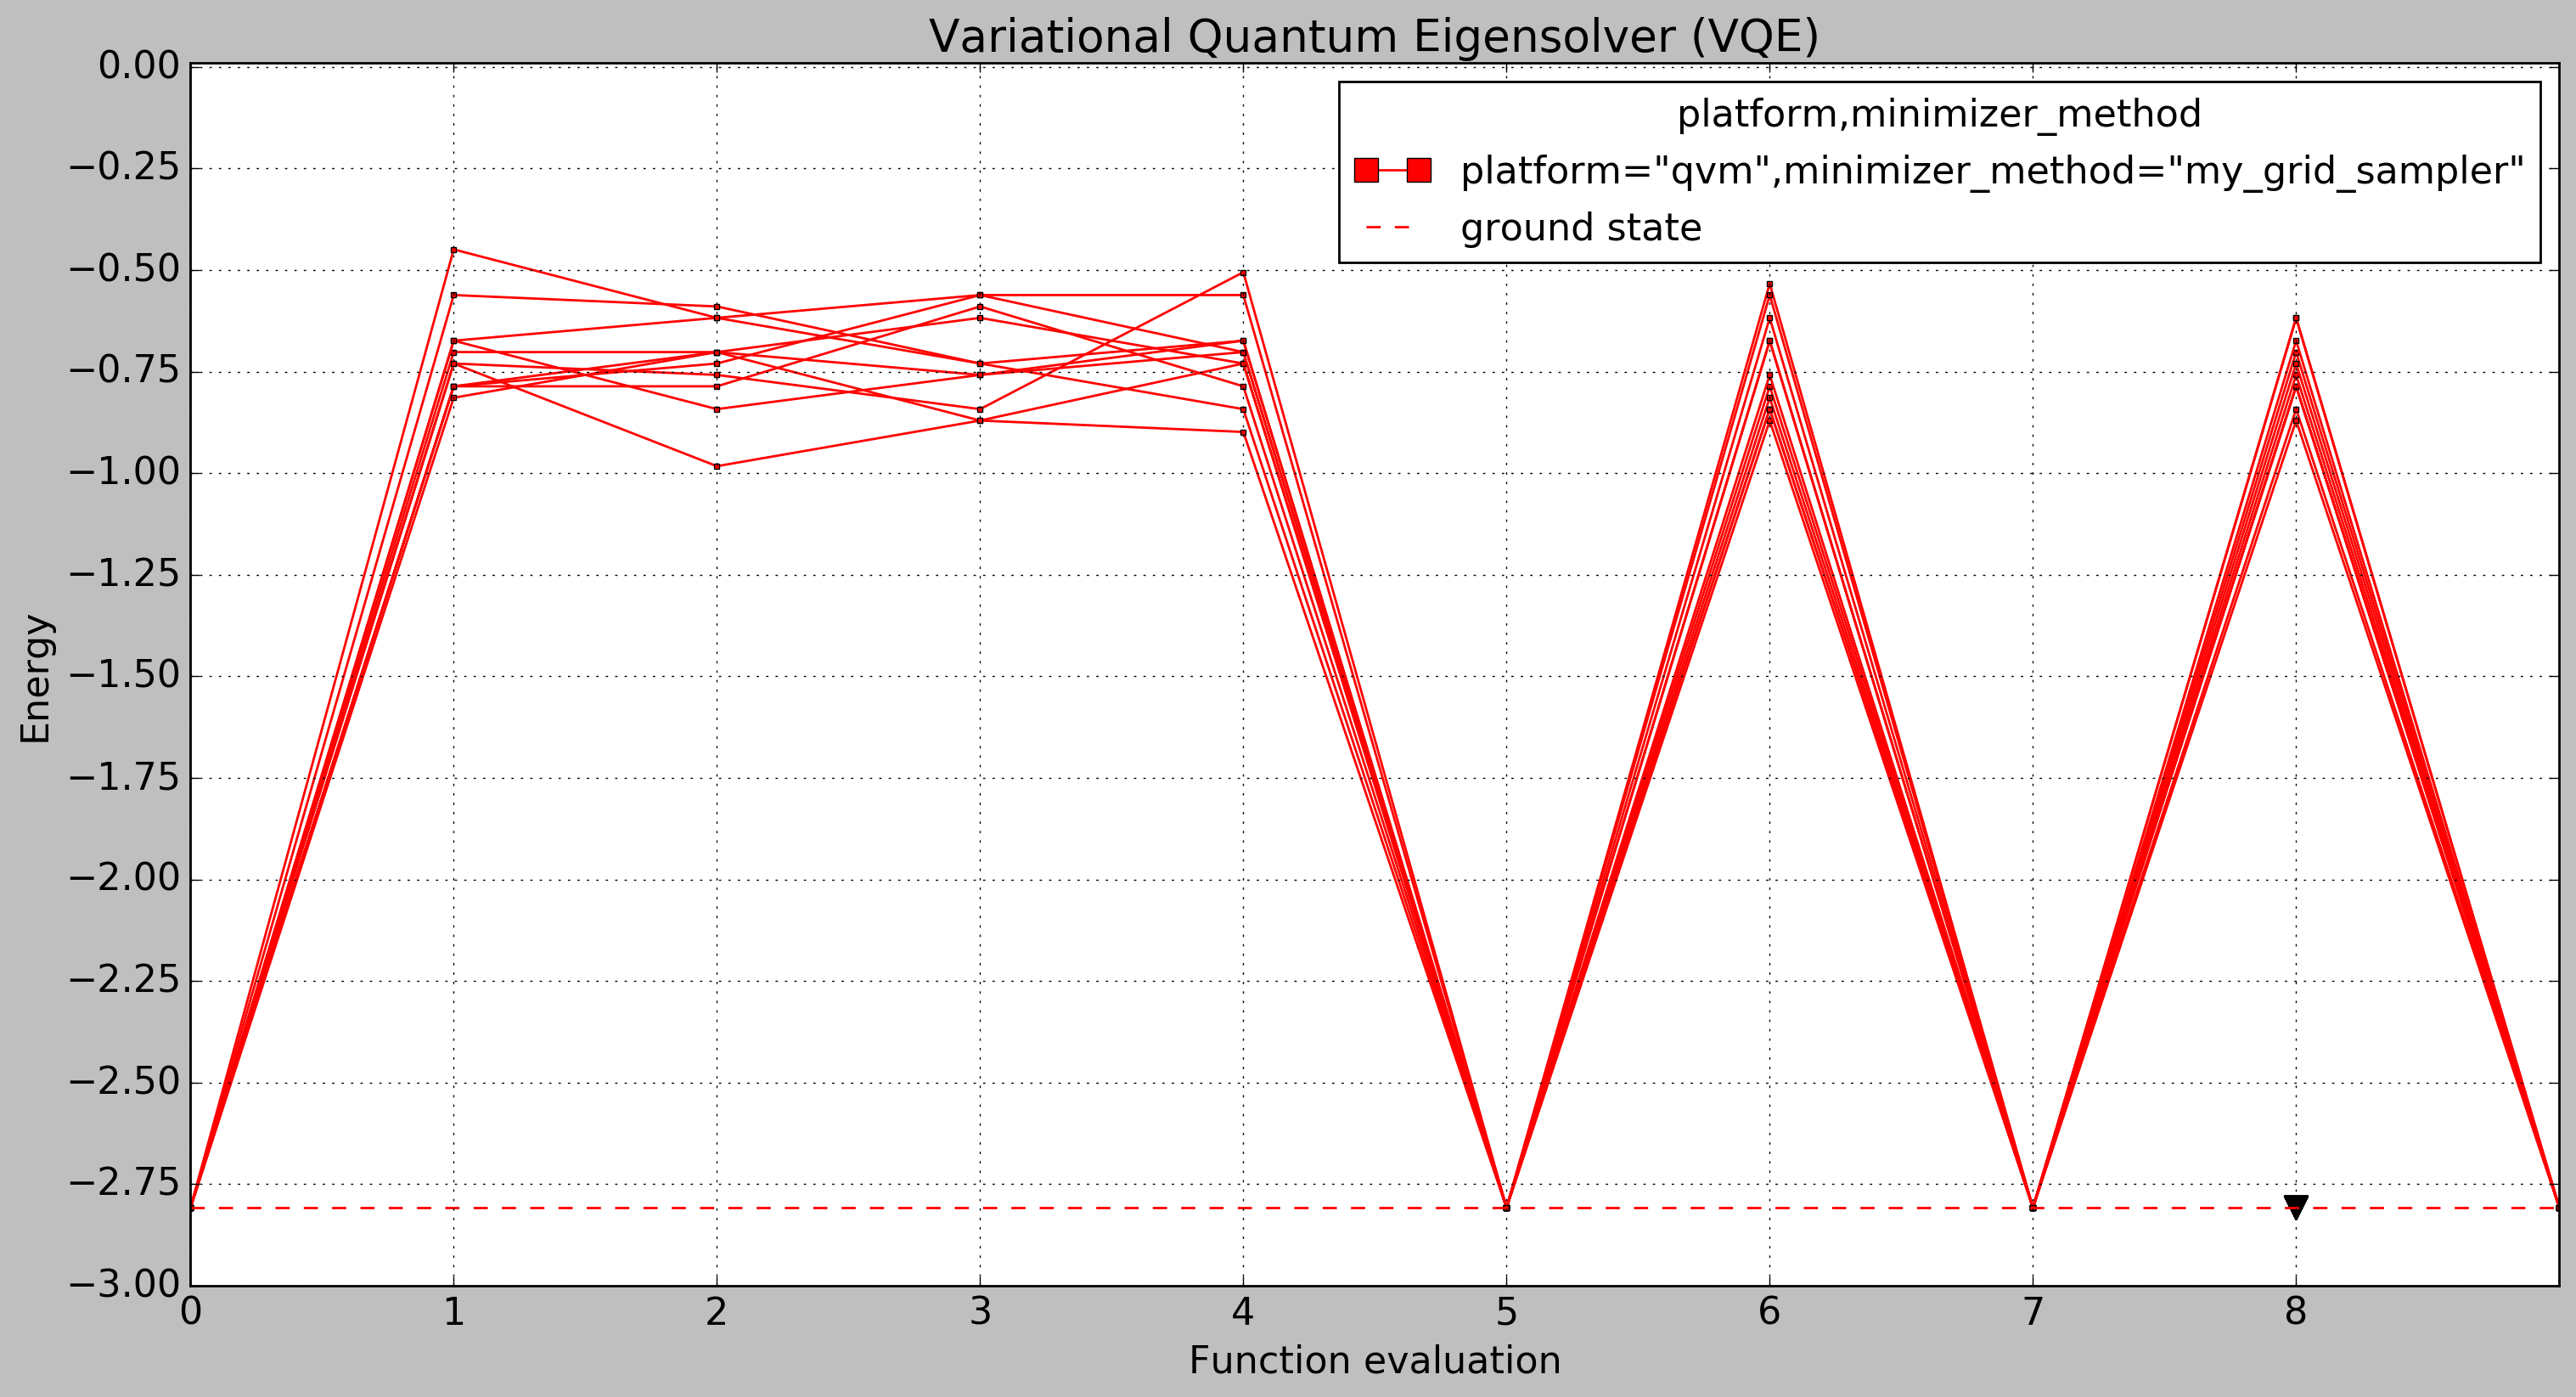

In [58]:
# Platform, Team, Experiment, minimizer Function, number of Samples, number of function eValuations, Repetition
(p,t,f,s,v,e) = idxmin_delta0
# Plot.
plot(df.loc[[(p,t,f,s,v,e,k) for k in range(len(df.loc[(p,t,f,s,v,e)]))]],
     xmax=9, xstep=1, ymin=-3.00, ymax=-0.00+0.01, legend_loc='upper right')

In [59]:
# Print the minimizer source.
print(df.loc[(p,t,f,s,v,e,0)]['minimizer_src'])

def my_grid_sampler( func, x0, my_args=(), my_options=None ):
    "Simple optimiser: samples on a grid and returns the minimum - used here as an example"

    my_options      = my_options or {}
    points          = 3             # Number of points in each dimension
    num_parameters  = 2 #len(x0)                                # get number of parameters needed for objective function

    flist = []
    xlist = []
    xgrid = []
    fgrid = []
    for i in range(points):
        xrow = []
        frow = []
        for j in range(points):
            x = [2*np.pi*i/points, 2*np.pi*j/points]    # Sample a point from a uniform grid
            fnew = func(x, my_args)
            flist.append(fnew)
            xlist.append(x)

            xrow.append(x)
            frow.append(fnew)

        xgrid.append(xrow)
        fgrid.append(frow)





    min_idx = np.argmin(flist)
    best_x  = xlist[min_idx]
    fmin    = flist[min_idx]
    print(fgrid)
    FTgrid = np.fft.fft2(fgrid)

    print(

### Plot convergence

In [60]:
# # Plot all.
# plot(df, legend_loc='center')

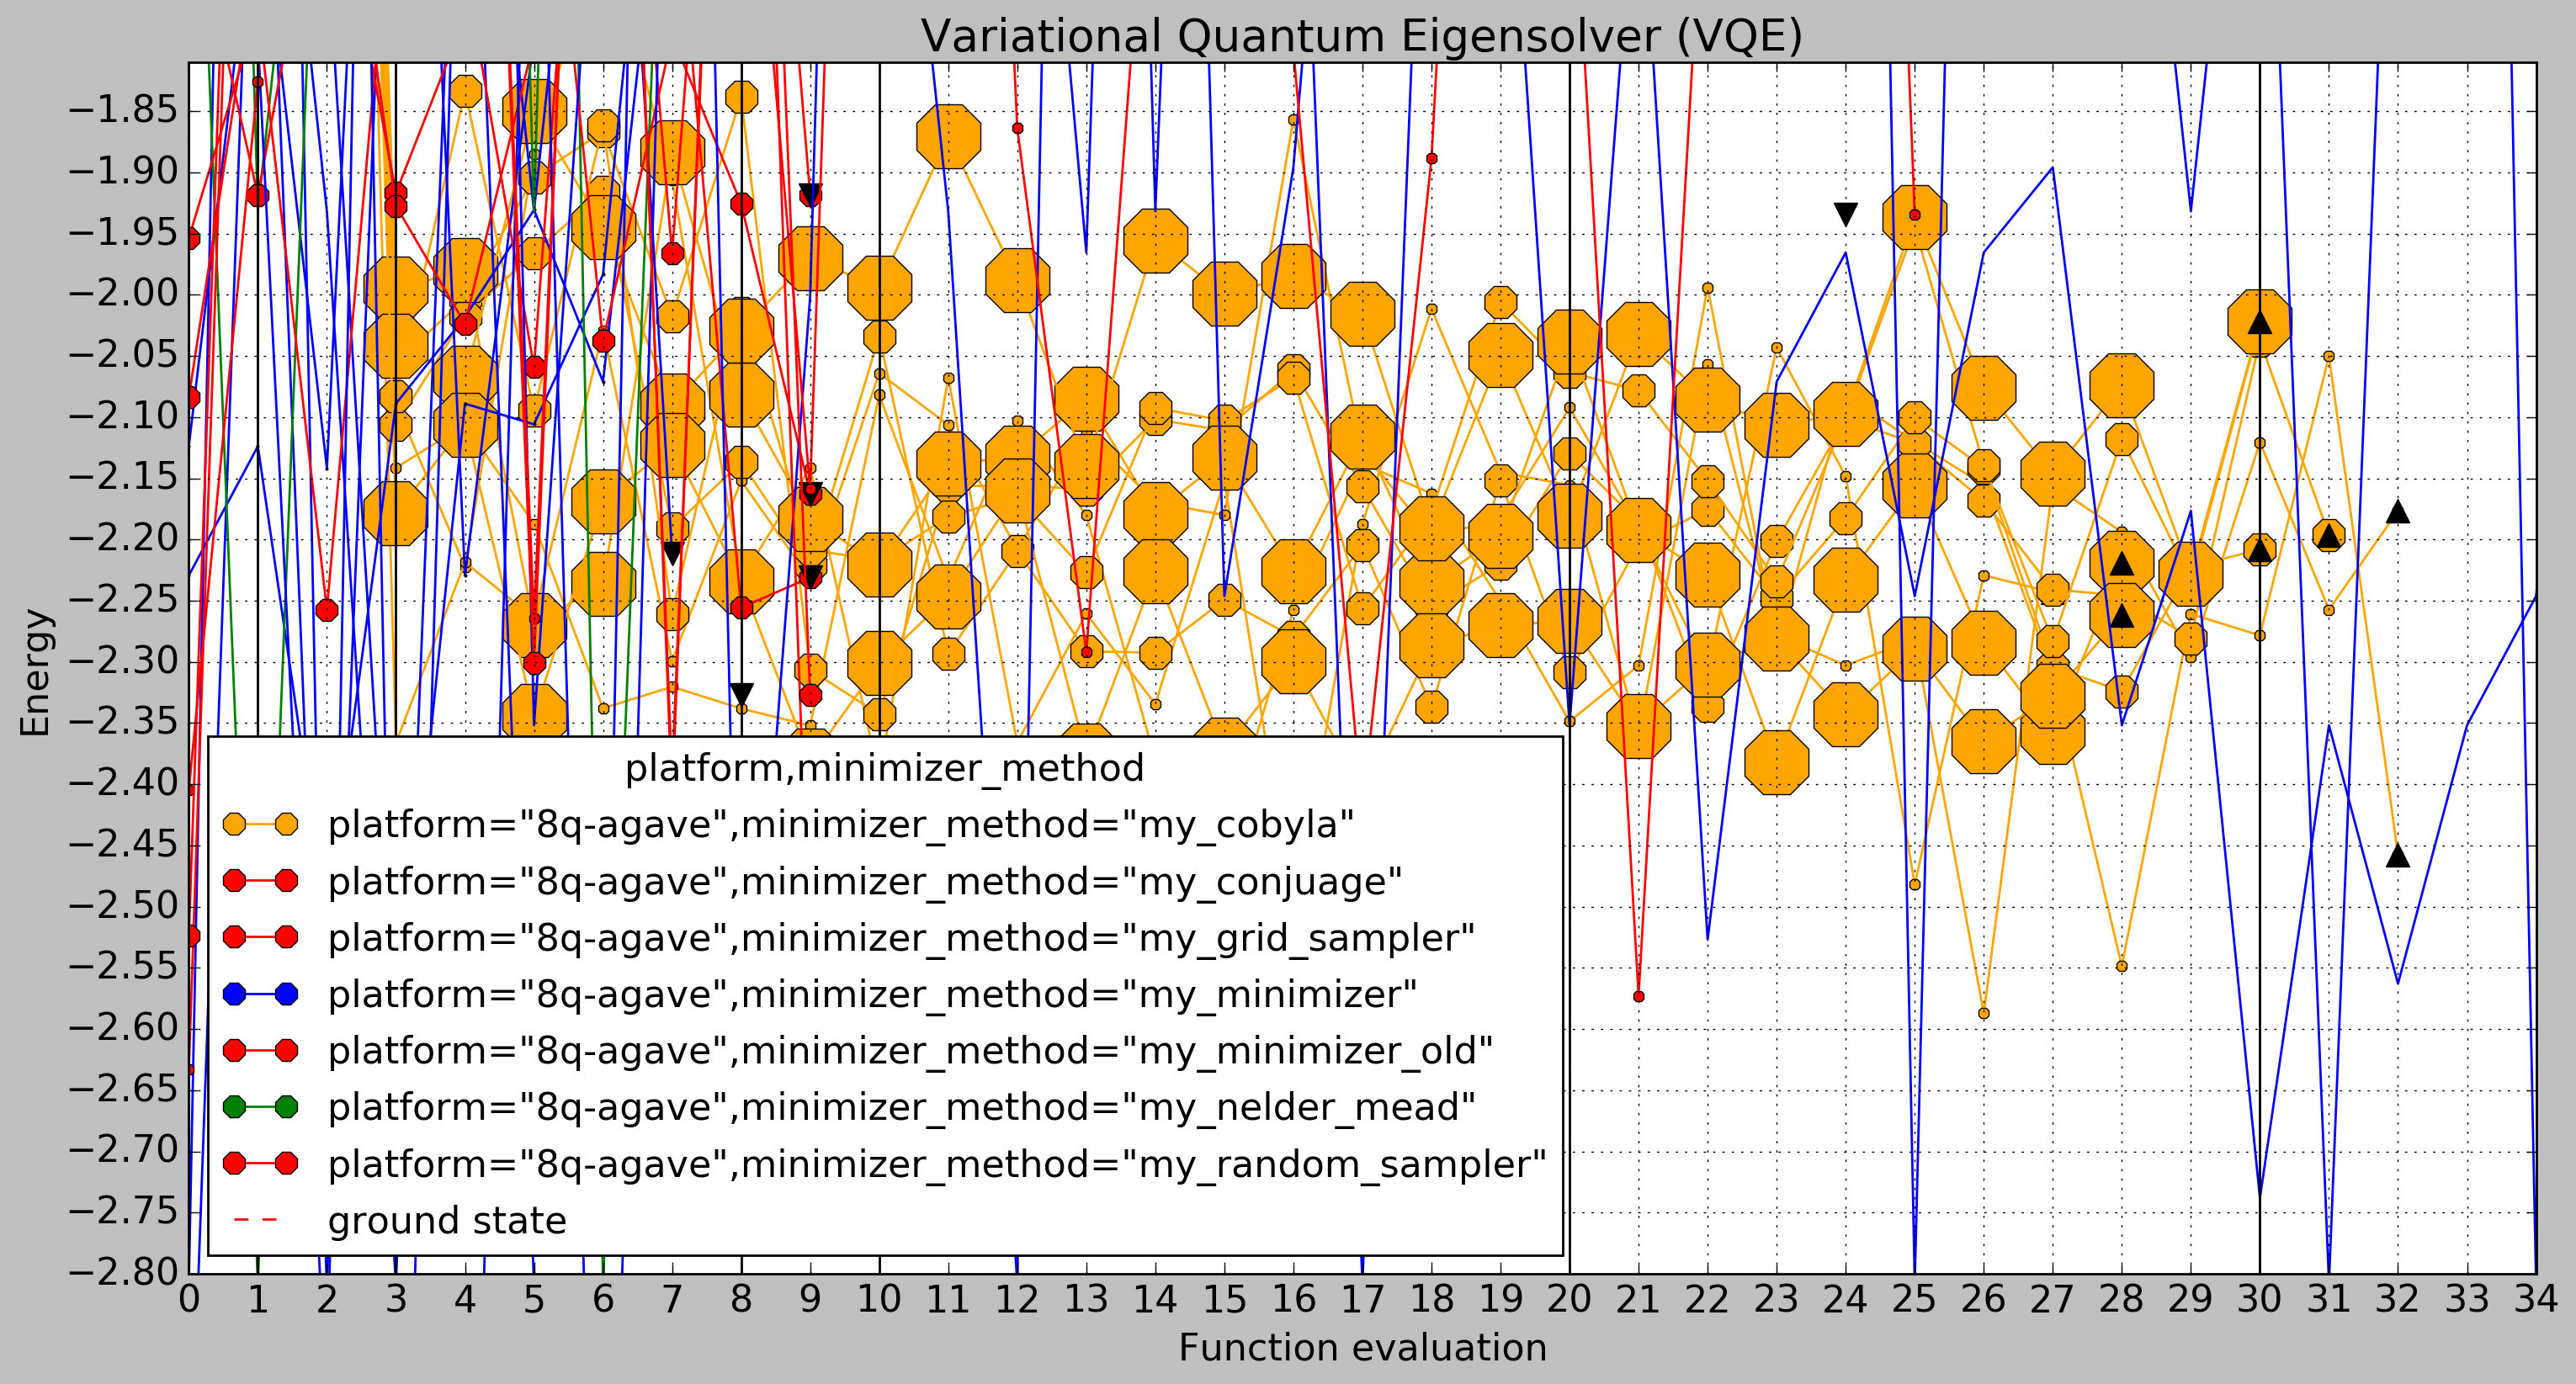

In [61]:
# Plot QPU only.
plot(df, platform_set=[platform_qpu], markersize_divisor=10,
     xmin=0, xmax=34+0.01, xstep=1, ymin=-2.80, ymax=-1.80-0.01, ystep=0.05, legend_loc='lower left')

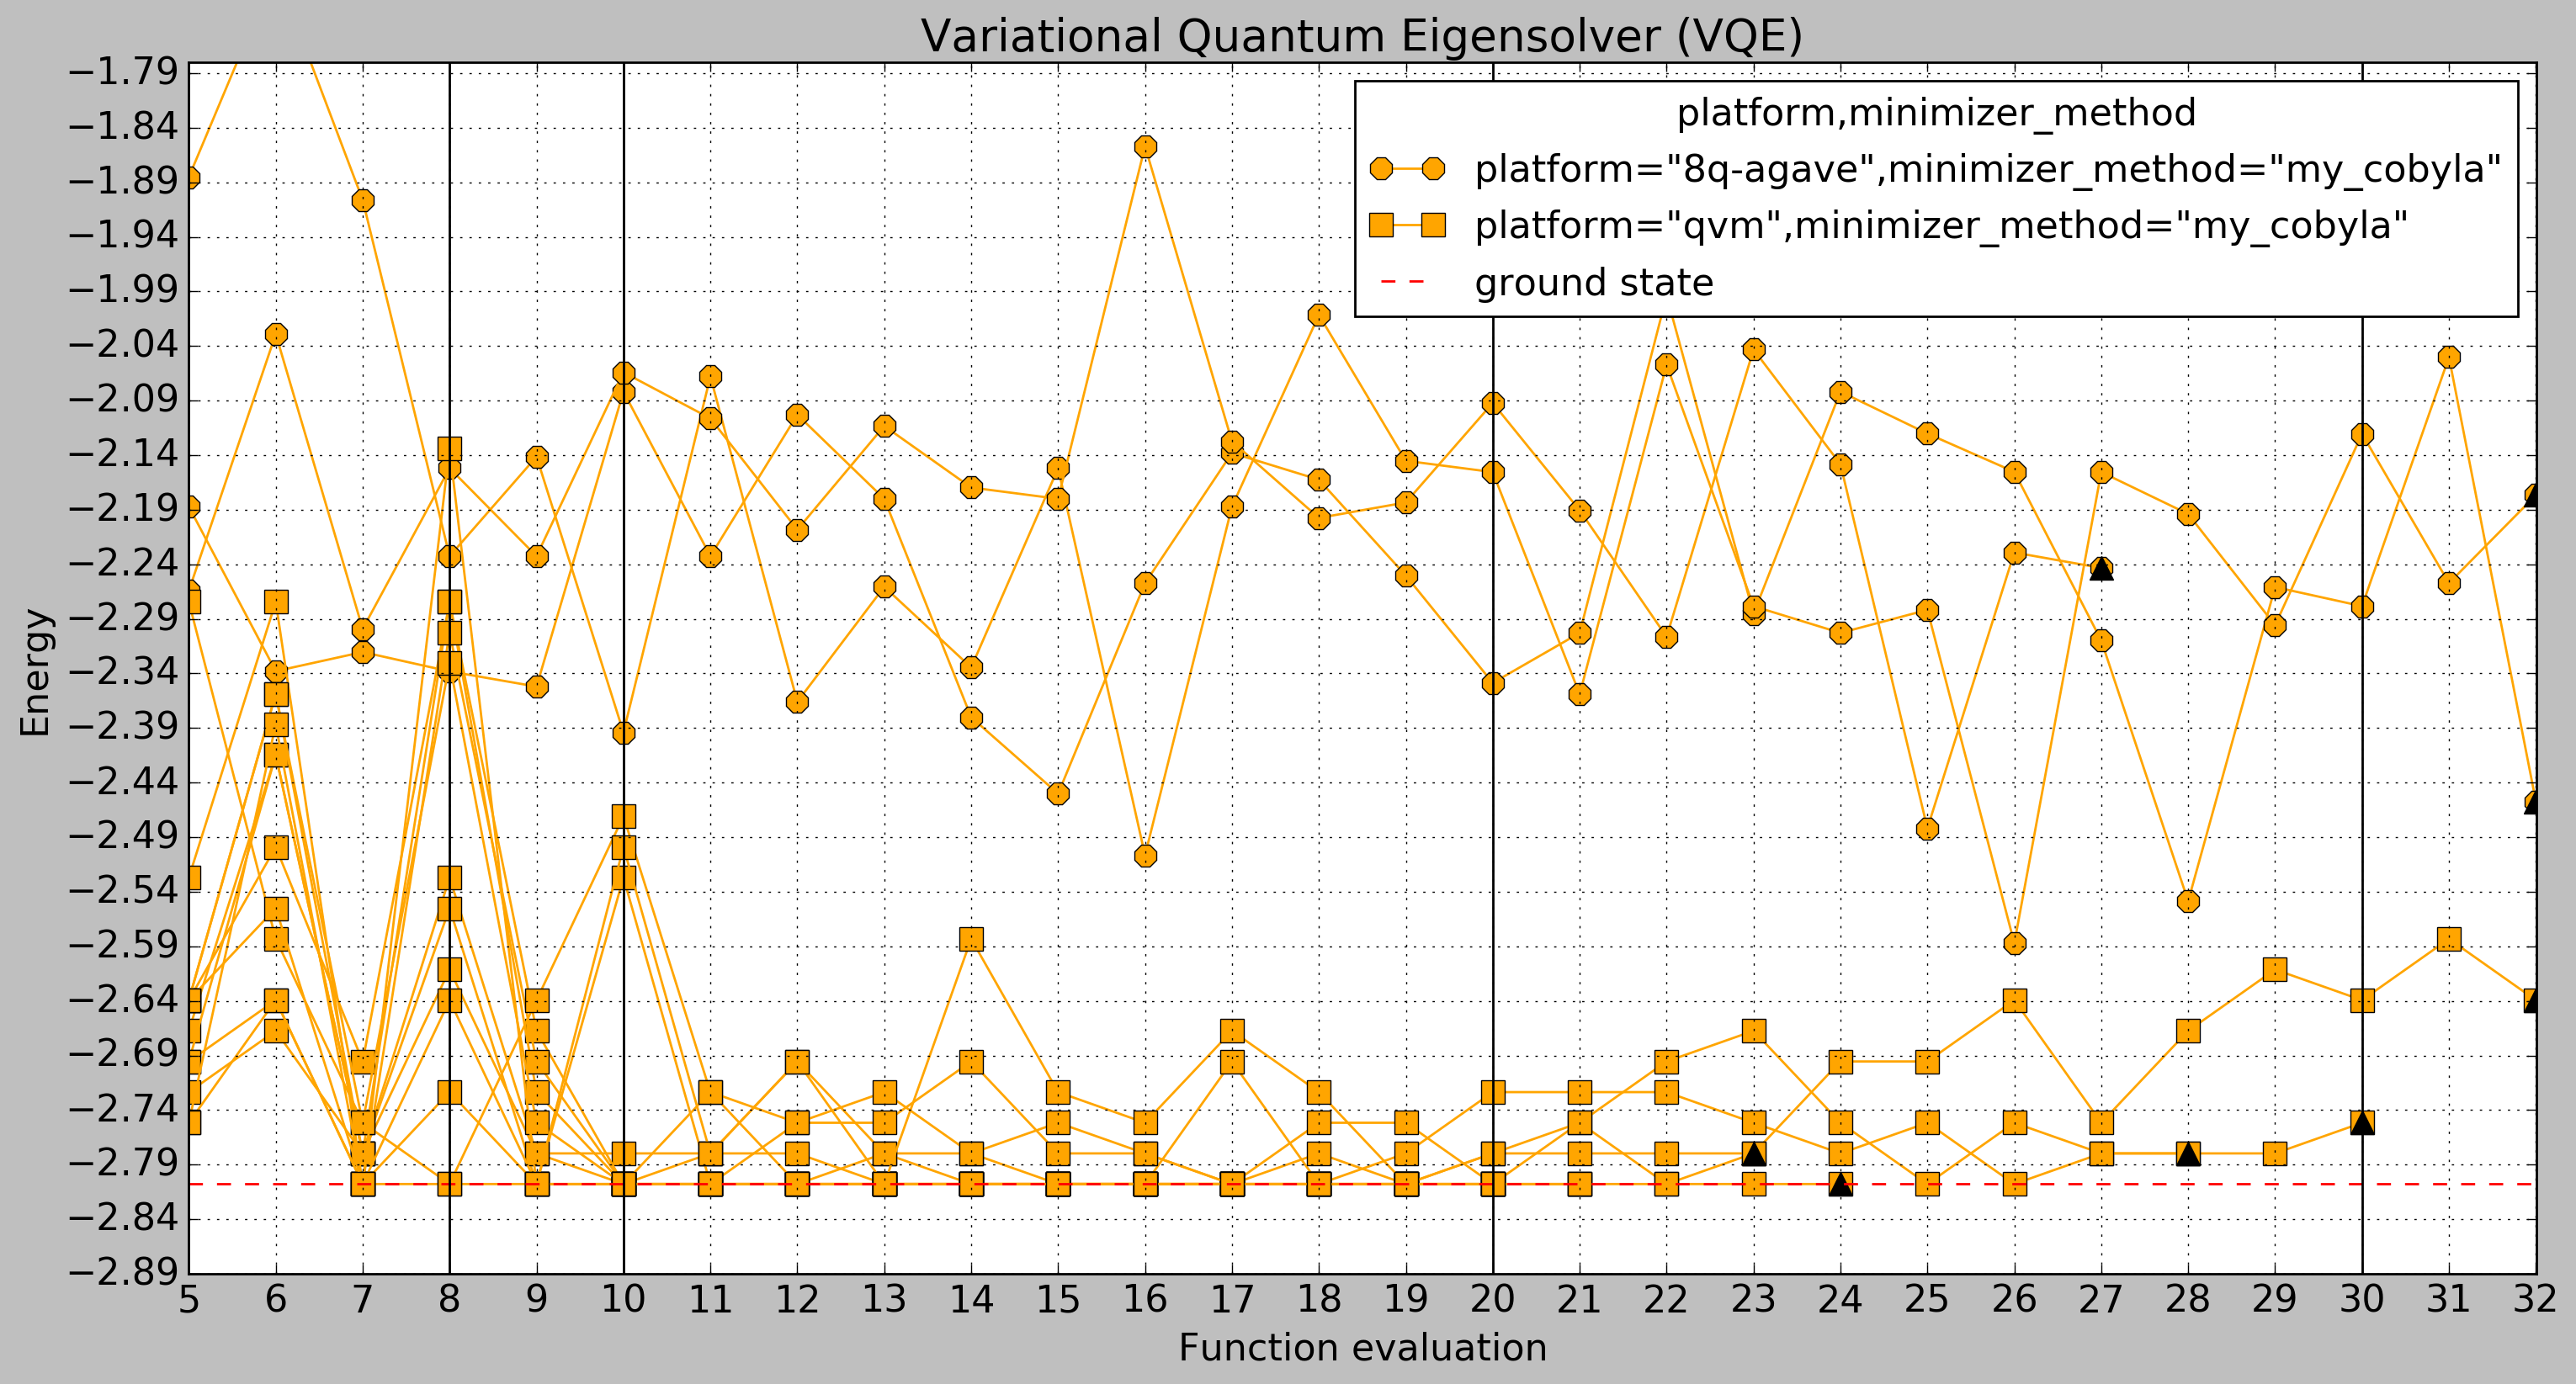

In [62]:
# Plot COBYLA only.
plot(df, minimizer_method_set=['my_cobyla'], sample_number_set=[50], markersize_divisor=5,
     xmin=5, xmax=32+0.01, xstep=1, ymin=-2.89, ymax=-1.79+0.01, ystep=0.05, legend_loc='upper right')

### Plot execution metrics

In [63]:
# plot_metric(df)

In [64]:
# plot_metric(df, metric='total_q_shots')